# ANÁLISIS EXPLORATORIO DE DATOS (EDA) - ACTUALIZADO
## Sistema de Scouting y Valoración de Jugadores de Fútbol

**Objetivo:** Descubrir qué atributos se correlacionan más con el valor de mercado de un jugador.

**Dataset:** FIFA 15-21 (122,501 jugadores, 73 columnas)

**Variable objetivo:** valor_mercado_eur

**ACTUALIZACIÓN:** Ahora incluye análisis de club, liga, reputación internacional y años de contrato

## PASO 1: Importar Librerías Necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## PASO 2: Cargar el Dataset Limpio

In [ ]:
# Cargar dataset procesado
df = pd.read_csv('../datos/procesados/fifa_limpio.csv')

print("Dataset cargado correctamente")
print(f"Dimensiones: {df.shape[0]:,} jugadores × {df.shape[1]} columnas")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset cargado correctamente
Dimensiones: 122,501 jugadores × 73 columnas
Memoria utilizada: 163.30 MB


## PASO 3: Exploración Inicial del Dataset

In [ ]:
# Primeras filas del dataset
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,id_sofifa,url_jugador,nombre_corto,nombre_completo,edad,fecha_nacimiento,altura_cm,peso_kg,nacionalidad,club,liga,posiciones_jugador,pie_preferido,pie_debil,habilidades_regate,ritmo_trabajo,tipo_cuerpo,tiene_foto_real,valoracion_global,potencial,valor_mercado_eur,salario_eur,clausula_rescision_eur,reputacion_internacional,contrato_valido_hasta,ritmo_velocidad,tiro_disparo,pase,regate_gambeta,defensa,fisico,ataque_centros,ataque_definicion,ataque_cabezazo,ataque_pase_corto,ataque_voleas,habilidad_regate,habilidad_efecto,habilidad_tiros_libres,habilidad_pase_largo,habilidad_control_balon,movimiento_aceleracion,movimiento_velocidad_sprint,movimiento_agilidad,movimiento_reacciones,movimiento_equilibrio,potencia_disparo,potencia_salto,potencia_resistencia,potencia_fuerza,potencia_tiros_lejanos,mentalidad_agresividad,mentalidad_intercepciones,mentalidad_posicionamiento,mentalidad_vision,mentalidad_penales,mentalidad_compostura,defensa_marcaje,defensa_entrada_pie,defensa_entrada_deslizante,gk_portero_estirada,gk_portero_manejo,gk_portero_saque,gk_portero_colocacion,gk_portero_reflejos,año_datos,calidad_promedio,diferencia_potencial,categoria_edad,categoria_posicion,ratio_valor_salario,anos_contrato_restantes,categoria_reputacion
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,Spain Primera Division,CF,Left,3,4,Medium/Low,Normal,Yes,93,95,100500000,550000,1200000.00,5,2018.00,93.00,89.00,86.00,96.00,27.00,63.00,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,59.00,25.00,21,20,6,11,15,14,8,2015,75.67,2,Prime,Delantero,3.51,0.00,Mundial
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,"LW, LM",Right,4,5,High/Low,Normal,Yes,92,92,79000000,375000,1200000.00,5,2018.00,93.00,93.00,81.00,91.00,32.00,79.00,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,59.00,22.00,31,23,7,11,15,14,11,2015,78.17,0,Prime,Mediocampista,4.05,0.00,Mundial
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,"RM, LM, RW",Left,2,4,High/Low,Normal,Yes,90,90,54500000,275000,1200000.00,5,2017.00,93.00,86.00,83.00,92.00,32.00,64.00,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,59.00,29.00,26,26,10,8,11,5,15,2015,75.00,0,Prime,Mediocampista,3.81,0.00,Mundial
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,French Ligue 1,ST,Right,4,4,Medium/Low,Normal,Yes,90,90,52500000,275000,1200000.00,5,2016.00,76.00,91.00,81.00,86.00,34.00,86.00,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,59.00,25.00,41,27,13,15,10,9,12,2015,75.67,0,Veterano,Delantero,3.67,0.00,Mundial
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,German 1. Bundesliga,GK,Right,4,1,Medium/Medium,Normal,Yes,90,90,63500000,300000,1200000.00,5,2019.00,69.00,54.00,58.00,63.00,55.00,66.00,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,37,59.00,25.00,25,25,87,85,92,90,86,2015,60.83,0,Prime,Portero,4.07,0.00,Mundial


In [9]:
# Información general del dataset
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122501 entries, 0 to 122500
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id_sofifa                    122501 non-null  int64  
 1   url_jugador                  122501 non-null  object 
 2   nombre_corto                 122501 non-null  object 
 3   nombre_completo              122501 non-null  object 
 4   edad                         122501 non-null  int64  
 5   fecha_nacimiento             122501 non-null  object 
 6   altura_cm                    122501 non-null  int64  
 7   peso_kg                      122501 non-null  int64  
 8   nacionalidad                 122501 non-null  object 
 9   club                         122501 non-null  object 
 10  liga                         122501 non-null  object 
 11  posiciones_jugador           122501 non-null  object 
 12  pie_preferido                1225

In [10]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de las variables numéricas:")
df.describe()

Estadísticas descriptivas de las variables numéricas:


,id_sofifa,edad,altura_cm,peso_kg,pie_debil,habilidades_regate,valoracion_global,potencial,valor_mercado_eur,salario_eur,clausula_rescision_eur,reputacion_internacional,contrato_valido_hasta,ritmo_velocidad,tiro_disparo,pase,regate_gambeta,defensa,fisico,ataque_centros,ataque_definicion,ataque_cabezazo,ataque_pase_corto,ataque_voleas,habilidad_regate,habilidad_efecto,habilidad_tiros_libres,habilidad_pase_largo,habilidad_control_balon,movimiento_aceleracion,movimiento_velocidad_sprint,movimiento_agilidad,movimiento_reacciones,movimiento_equilibrio,potencia_disparo,potencia_salto,potencia_resistencia,potencia_fuerza,potencia_tiros_lejanos,mentalidad_agresividad,mentalidad_intercepciones,mentalidad_posicionamiento,mentalidad_vision,mentalidad_penales,mentalidad_compostura,defensa_marcaje,defensa_entrada_pie,defensa_entrada_deslizante,gk_portero_estirada,gk_portero_manejo,gk_portero_saque,gk_portero_colocacion,gk_portero_reflejos,año_datos,calidad_promedio,diferencia_potencial,ratio_valor_salario,anos_contrato_restantes
count,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00,122501.00
mean,208503.72,25.11,181.19,75.30,2.94,2.32,65.71,70.68,2050152.46,11257.39,3044878.52,1.11,2019.49,68.07,52.39,56.97,62.07,51.40,64.96,49.75,45.51,52.41,58.23,43.23,55.09,47.30,43.23,52.44,58.17,64.73,64.93,63.37,61.65,63.91,56.44,65.01,63.15,65.22,47.33,55.79,46.59,49.90,52.81,48.91,58.09,46.24,47.55,45.61,16.56,16.30,16.16,16.31,16.68,2018.12,59.31,4.97,5.06,0.31
std,34923.79,4.64,6.71,6.98,0.66,0.75,7.09,6.30,4891097.66,22505.52,8135923.69,0.39,2.29,10.52,13.13,10.02,9.91,15.87,9.17,18.02,19.09,17.07,14.76,17.37,18.53,18.09,17.28,15.33,16.54,14.58,14.31,14.64,9.22,13.92,16.16,11.81,15.71,12.59,18.90,17.30,20.30,19.03,14.46,15.61,10.71,17.30,21.37,21.00,17.70,16.83,16.44,16.98,18.00,1.99,6.38,5.17,14.98,0.74
min,2.00,16.00,154.00,49.00,1.00,1.00,40.00,40.00,0.00,0.00,9000.00,1.00,2014.00,21.00,14.00,20.00,22.00,14.00,27.00,5.00,2.00,4.00,7.00,3.00,2.00,4.00,3.00,5.00,5.00,11.00,11.00,11.00,20.00,10.00,2.00,13.00,10.00,12.00,3.00,2.00,3.00,2.00,5.00,5.00,3.00,3.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00,2015.00,34.33,0.00,0.00,0.00
25%,193011.00,21.00,176.00,70.00,3.00,2.00,61.00,66.00,250000.00,2000.00,1000000.00,1.00,2018.00,63.00,44.00,51.00,57.00,37.00,60.00,38.00,30.00,45.00,53.00,30.00,48.00,34.00,31.00,42.00,53.00,56.00,57.00,56.00,55.00,56.00,47.00,58.00,56.00,58.00,33.00,44.00,26.00,38.00,43.00,39.00,54.00,34.00,26.00,25.00,8.00,8.00,8.00,8.00,8.00,2016.00,55.17,0.00,1.50,0.00
50%,214326.00,25.00,181.00,75.00,3.00,2.00,66.00,70.00,600000.00,4000.00,1200000.00,1.00,2020.00,69.00,54.00,58.00,63.00,55.00,66.00,54.00,48.00,55.00,62.00,44.00,60.00,48.00,42.00,56.00,62.00,67.00,67.00,65.00,62.00,66.00,59.00,66.00,66.00,66.00,51.00,58.00,52.00,55.00,54.00,50.00,59.00,49.00,54.00,51.00,11.00,11.00,11.00,11.00,11.00,2018.00,60.33,4.00,2.69,0.00
75%,231448.00,28.00,186.00,80.00,3.00,3.00,70.00,75.00,1600000.00,10000.00,1400000.00,1.00,2021.00,75.00,62.00,63.00,68.00,64.00,71.00,64.00,61.00,64.00,68.00,57.00,68.00,61.00,57.00,64.00,69.00,75.00,75.00,74.00,68.00,74.00,68.00,73.00,74.00,74.00,62.00,69.00,64.00,64.00,64.00,61.00,64.00,58.00,66.00,64.00,14.00,14.00,14.00,14.00,14.00,2020.00,63.17,8.00,4.97,0.00
max,258970.00,53.00,208.00,110.00,5.00,5.00,94.00,95.00,123000000.00,575000.00,236800000.00,5.00,2028.00,97.00,93.00,93.00,96.00,91.00,92.00,94.00,95.00,95.00,95.00,93.00,97.00,94.00,95.00,95.00,96.00,97.00,97.00,96.00,96.00,97.00,96.00,97.00

In [37]:
# Verificar valores nulos
print("Valores nulos por columna:")
valores_nulos = df.isnull().sum()
print(f"\nTotal de columnas con valores nulos: {(valores_nulos > 0).sum()}")
print(f"Total de valores nulos en todo el dataset: {valores_nulos.sum()}")

Valores nulos por columna:

Total de columnas con valores nulos: 0
Total de valores nulos en todo el dataset: 0


## PASO 4: Análisis de la Variable Objetivo (valor_mercado_eur)

In [38]:
# Estadísticas del valor de mercado
print("Análisis de la variable objetivo: valor_mercado_eur")
print("=" * 60)
print(f"Media: €{df['valor_mercado_eur'].mean():,.0f}")
print(f"Mediana: €{df['valor_mercado_eur'].median():,.0f}")
print(f"Desviación estándar: €{df['valor_mercado_eur'].std():,.0f}")
print(f"Mínimo: €{df['valor_mercado_eur'].min():,.0f}")
print(f"Máximo: €{df['valor_mercado_eur'].max():,.0f}")
print(f"\nCuartiles:")
print(df['valor_mercado_eur'].quantile([0.25, 0.5, 0.75]))

# Verificar coeficiente de variación
cv = df['valor_mercado_eur'].std() / df['valor_mercado_eur'].mean()
print(f"\nCoeficiente de variación: {cv:.2f}")
print(f"Interpretación: {'Distribución muy dispersa' if cv > 1 else 'Distribución moderadamente dispersa'}")

Análisis de la variable objetivo: valor_mercado_eur
Media: €2,050,152
Mediana: €600,000
Desviación estándar: €4,891,098
Mínimo: €0
Máximo: €123,000,000

Cuartiles:
0.25    250000.00
0.50    600000.00
0.75   1600000.00
Name: valor_mercado_eur, dtype: float64

Coeficiente de variación: 2.39
Interpretación: Distribución muy dispersa


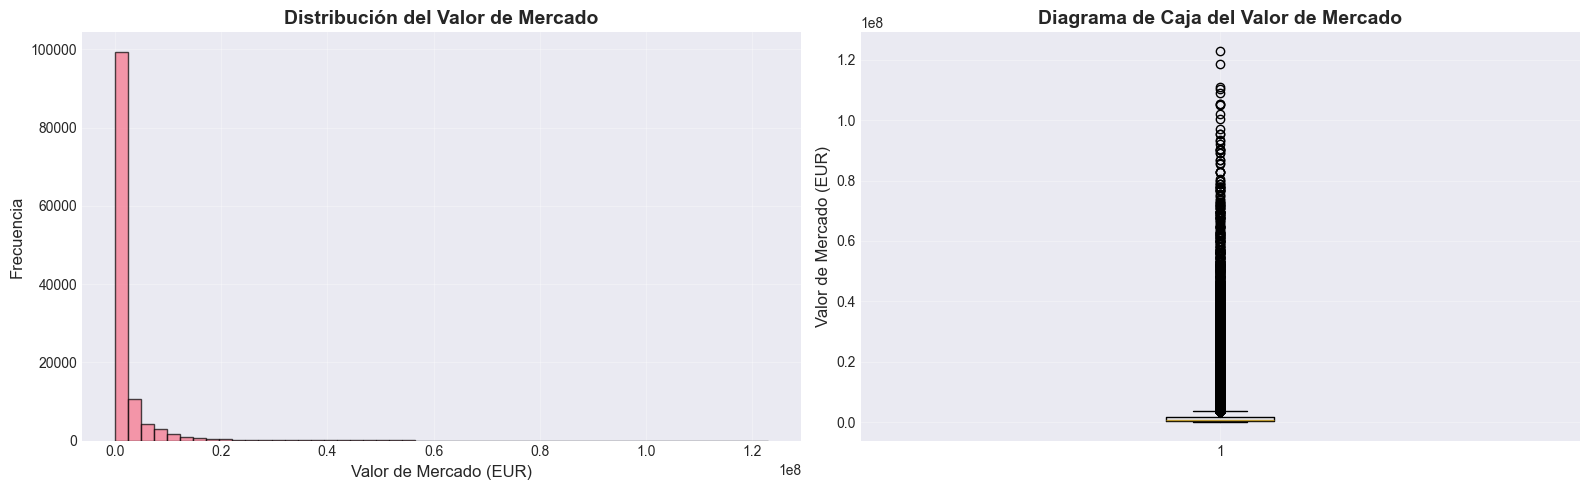

In [39]:
# Distribución del valor de mercado
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histograma
axes[0].hist(df['valor_mercado_eur'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Valor de Mercado (EUR)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución del Valor de Mercado', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['valor_mercado_eur'], vert=True)
axes[1].set_ylabel('Valor de Mercado (EUR)', fontsize=12)
axes[1].set_title('Diagrama de Caja del Valor de Mercado', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## PASO 5: Matriz de Correlación Completa

Vamos a calcular la correlación de TODAS las variables numéricas con el valor de mercado.

In [40]:
# Seleccionar solo columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total de columnas numéricas: {len(columnas_numericas)}")
print(f"\nColumnas numéricas disponibles:")
for i, col in enumerate(columnas_numericas, 1):
    print(f"{i:2d}. {col}")

Total de columnas numéricas: 58

Columnas numéricas disponibles:
 1. id_sofifa
 2. edad
 3. altura_cm
 4. peso_kg
 5. pie_debil
 6. habilidades_regate
 7. valoracion_global
 8. potencial
 9. valor_mercado_eur
10. salario_eur
11. clausula_rescision_eur
12. reputacion_internacional
13. contrato_valido_hasta
14. ritmo_velocidad
15. tiro_disparo
16. pase
17. regate_gambeta
18. defensa
19. fisico
20. ataque_centros
21. ataque_definicion
22. ataque_cabezazo
23. ataque_pase_corto
24. ataque_voleas
25. habilidad_regate
26. habilidad_efecto
27. habilidad_tiros_libres
28. habilidad_pase_largo
29. habilidad_control_balon
30. movimiento_aceleracion
31. movimiento_velocidad_sprint
32. movimiento_agilidad
33. movimiento_reacciones
34. movimiento_equilibrio
35. potencia_disparo
36. potencia_salto
37. potencia_resistencia
38. potencia_fuerza
39. potencia_tiros_lejanos
40. mentalidad_agresividad
41. mentalidad_intercepciones
42. mentalidad_posicionamiento
43. mentalidad_vision
44. mentalidad_penales
45

In [41]:
# Calcular matriz de correlación
matriz_correlacion = df[columnas_numericas].corr()

print("Matriz de correlación calculada correctamente")
print(f"Dimensiones: {matriz_correlacion.shape}")

Matriz de correlación calculada correctamente
Dimensiones: (58, 58)


## PASO 6: Identificar Atributos Más Correlacionados con el Valor de Mercado

Este es el análisis CLAVE para nuestro sistema de ML.

In [43]:
# Extraer correlaciones con valor_mercado_eur
correlaciones_valor = matriz_correlacion['valor_mercado_eur'].sort_values(ascending=False)

# Eliminar la correlación consigo mismo (siempre es 1.0)
correlaciones_valor = correlaciones_valor.drop('valor_mercado_eur')

print("TOP 20 ATRIBUTOS MÁS CORRELACIONADOS CON EL VALOR DE MERCADO")
print("=" * 70)
print(f"{'Posición':<10} {'Atributo':<30} {'Correlación':>15}")
print("-" * 70)

for i, (atributo, correlacion) in enumerate(correlaciones_valor.head(20).items(), 1):
    print(f"{i:<10} {atributo:<30} {correlacion:>15.4f}")

TOP 20 ATRIBUTOS MÁS CORRELACIONADOS CON EL VALOR DE MERCADO
Posición   Atributo                           Correlación
----------------------------------------------------------------------
1          clausula_rescision_eur                  0.8359
2          salario_eur                             0.8231
3          reputacion_internacional                0.6423
4          valoracion_global                       0.6067
5          potencial                               0.5631
6          movimiento_reacciones                   0.5178
7          calidad_promedio                        0.4560
8          pase                                    0.3983
9          mentalidad_compostura                   0.3856
10         regate_gambeta                          0.3849
11         mentalidad_vision                       0.3341
12         tiro_disparo                            0.3129
13         ataque_pase_corto                       0.3086
14         habilidad_control_balon                 0.289

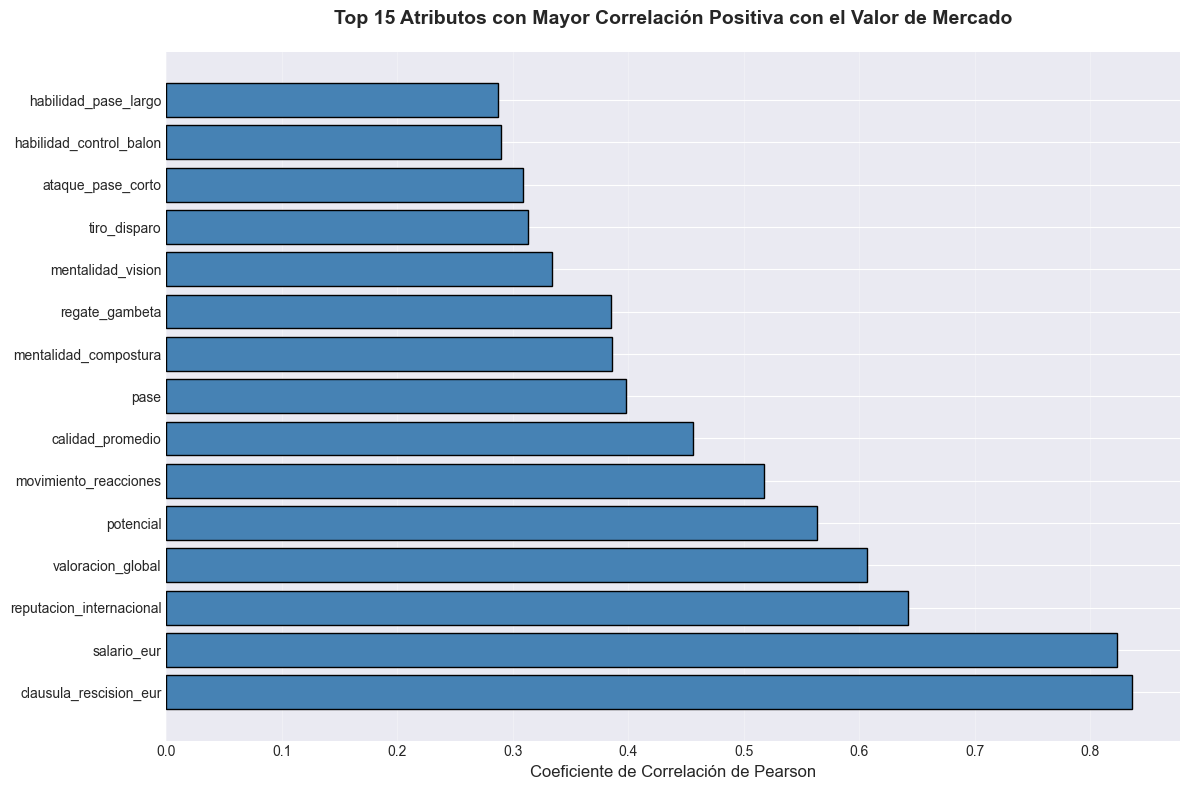

In [44]:
# Visualizar top 15 correlaciones positivas
top_15_positivas = correlaciones_valor.head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_15_positivas)), top_15_positivas.values, color='steelblue', edgecolor='black')
plt.yticks(range(len(top_15_positivas)), top_15_positivas.index)
plt.xlabel('Coeficiente de Correlación de Pearson', fontsize=12)
plt.title('Top 15 Atributos con Mayor Correlación Positiva con el Valor de Mercado', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## PASO 7: Heatmap de Correlación (Top Atributos)

Visualización de la matriz de correlación entre los atributos más relevantes.

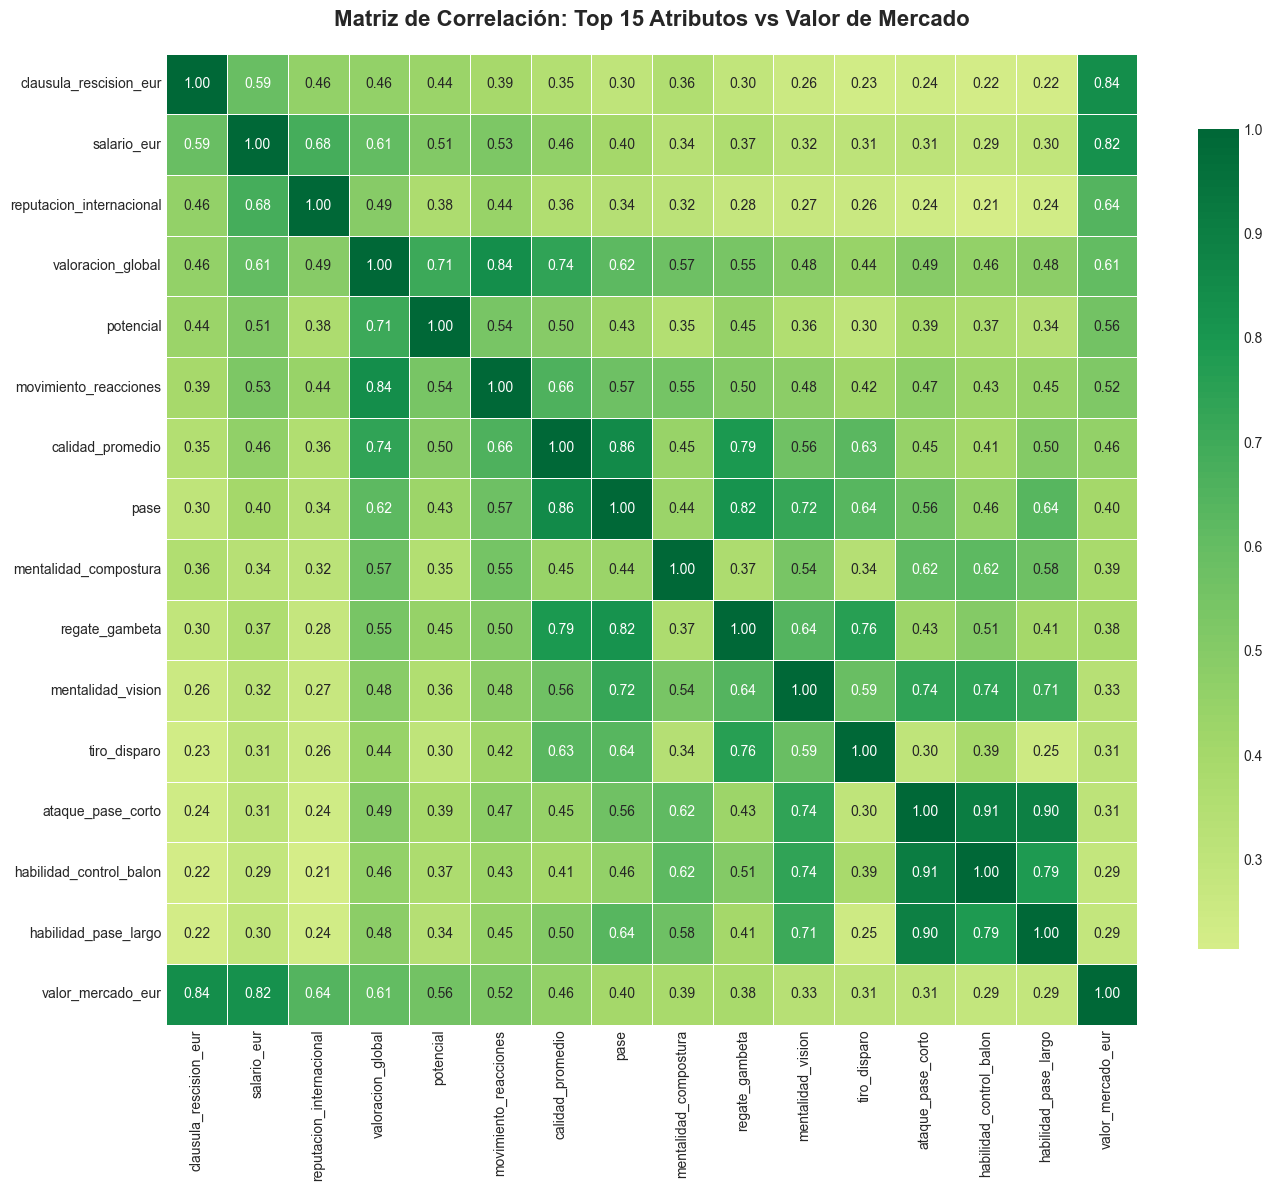

In [45]:
# Seleccionar top 15 atributos + valor_mercado_eur
top_atributos = list(correlaciones_valor.head(15).index) + ['valor_mercado_eur']
matriz_top = df[top_atributos].corr()

# Crear heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(matriz_top, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación: Top 15 Atributos vs Valor de Mercado', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## PASO 8: Análisis de Relación: Valoración Global vs Valor de Mercado

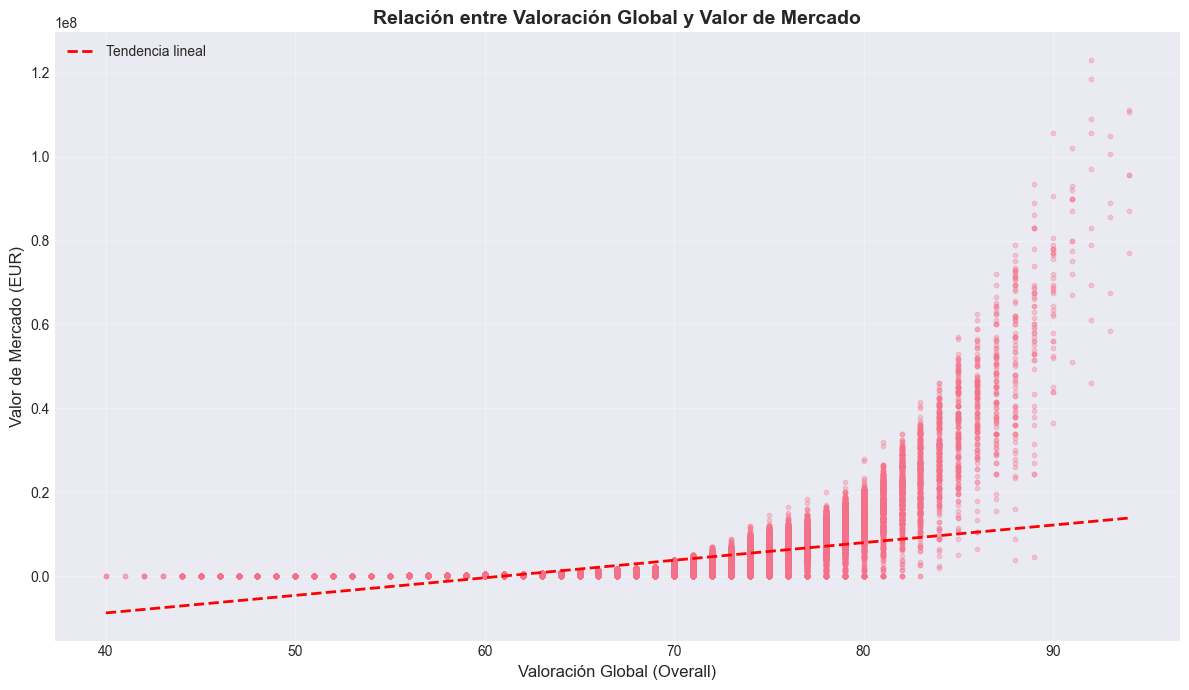


Correlación de Pearson: 0.6067


In [46]:
# Scatter plot: valoracion_global vs valor_mercado_eur
plt.figure(figsize=(12, 7))
plt.scatter(df['valoracion_global'], df['valor_mercado_eur'], alpha=0.3, s=10)
plt.xlabel('Valoración Global (Overall)', fontsize=12)
plt.ylabel('Valor de Mercado (EUR)', fontsize=12)
plt.title('Relación entre Valoración Global y Valor de Mercado', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Agregar línea de tendencia
z = np.polyfit(df['valoracion_global'], df['valor_mercado_eur'], 1)
p = np.poly1d(z)
plt.plot(df['valoracion_global'].sort_values(), 
         p(df['valoracion_global'].sort_values()), 
         "r--", linewidth=2, label='Tendencia lineal')
plt.legend()
plt.tight_layout()
plt.show()

# Correlación
corr_overall = df['valoracion_global'].corr(df['valor_mercado_eur'])
print(f"\nCorrelación de Pearson: {corr_overall:.4f}")

## PASO 9: Análisis de Relación: Potencial vs Valor de Mercado

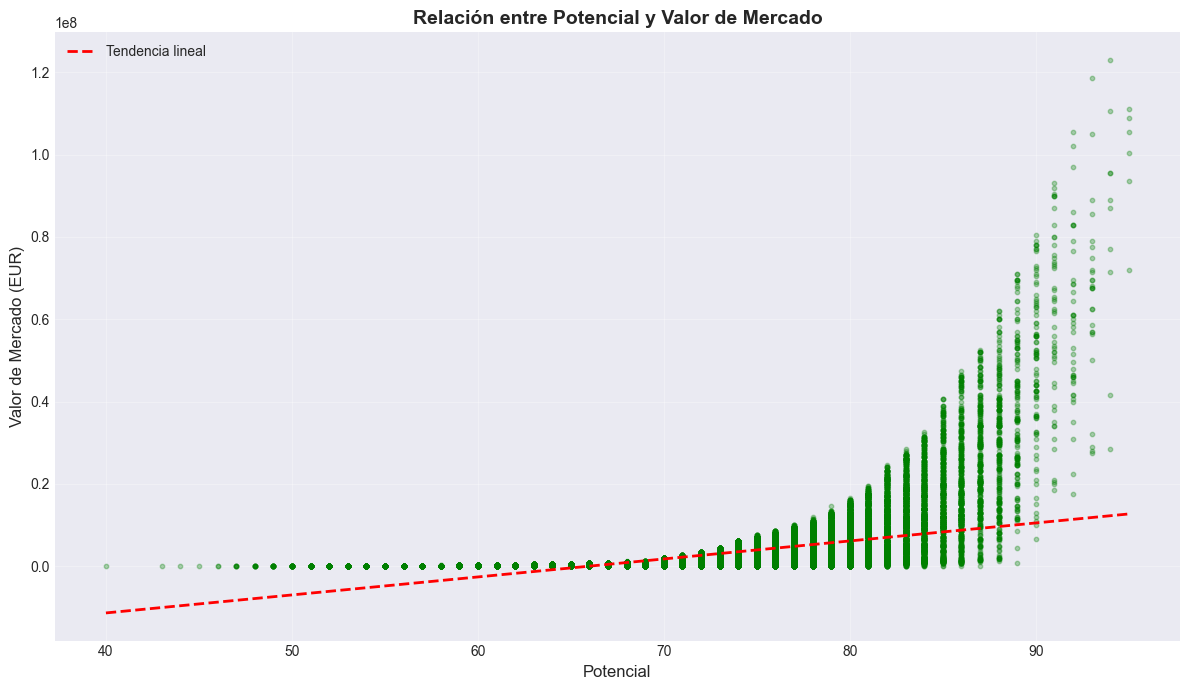


Correlación de Pearson: 0.5631


In [47]:
# Scatter plot: potencial vs valor_mercado_eur
plt.figure(figsize=(12, 7))
plt.scatter(df['potencial'], df['valor_mercado_eur'], alpha=0.3, s=10, color='green')
plt.xlabel('Potencial', fontsize=12)
plt.ylabel('Valor de Mercado (EUR)', fontsize=12)
plt.title('Relación entre Potencial y Valor de Mercado', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Agregar línea de tendencia
z = np.polyfit(df['potencial'], df['valor_mercado_eur'], 1)
p = np.poly1d(z)
plt.plot(df['potencial'].sort_values(), 
         p(df['potencial'].sort_values()), 
         "r--", linewidth=2, label='Tendencia lineal')
plt.legend()
plt.tight_layout()
plt.show()

# Correlación
corr_potential = df['potencial'].corr(df['valor_mercado_eur'])
print(f"\nCorrelación de Pearson: {corr_potential:.4f}")

## PASO 10: Análisis por Categoría de Posición

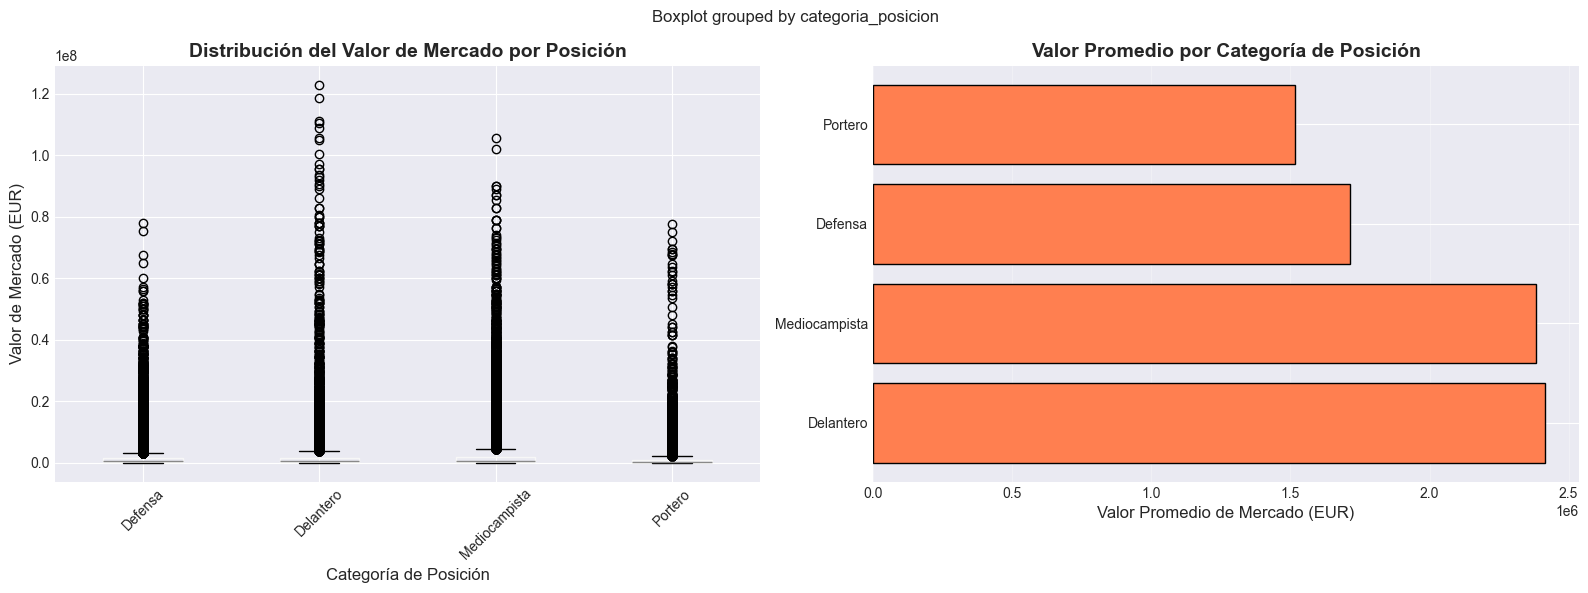


Estadísticas por Categoría de Posición:
                      count       mean        std  min       25%       50%  \
categoria_posicion                                                           
Defensa            44054.00 1714394.72 3696100.78 0.00 250000.00 575000.00   
Delantero          18206.00 2414831.37 6496641.40 0.00 275000.00 675000.00   
Mediocampista      46630.00 2380963.63 5254027.14 0.00 300000.00 725000.00   
Portero            13611.00 1515761.37 4343819.47 0.00 140000.00 375000.00   

                          75%          max  
categoria_posicion                          
Defensa            1400000.00  78000000.00  
Delantero          1700000.00 123000000.00  
Mediocampista      2000000.00 105500000.00  
Portero             925000.00  77500000.00  


In [48]:
# Distribución del valor de mercado por posición
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
df.boxplot(column='valor_mercado_eur', by='categoria_posicion', ax=axes[0])
axes[0].set_xlabel('Categoría de Posición', fontsize=12)
axes[0].set_ylabel('Valor de Mercado (EUR)', fontsize=12)
axes[0].set_title('Distribución del Valor de Mercado por Posición', fontsize=14, fontweight='bold')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Promedio por posición
promedio_por_posicion = df.groupby('categoria_posicion')['valor_mercado_eur'].mean().sort_values(ascending=False)
axes[1].barh(range(len(promedio_por_posicion)), promedio_por_posicion.values, color='coral', edgecolor='black')
axes[1].set_yticks(range(len(promedio_por_posicion)))
axes[1].set_yticklabels(promedio_por_posicion.index)
axes[1].set_xlabel('Valor Promedio de Mercado (EUR)', fontsize=12)
axes[1].set_title('Valor Promedio por Categoría de Posición', fontsize=14, fontweight='bold')
axes[1].grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEstadísticas por Categoría de Posición:")
print(df.groupby('categoria_posicion')['valor_mercado_eur'].describe())

## PASO 11: Análisis por Categoría de Edad

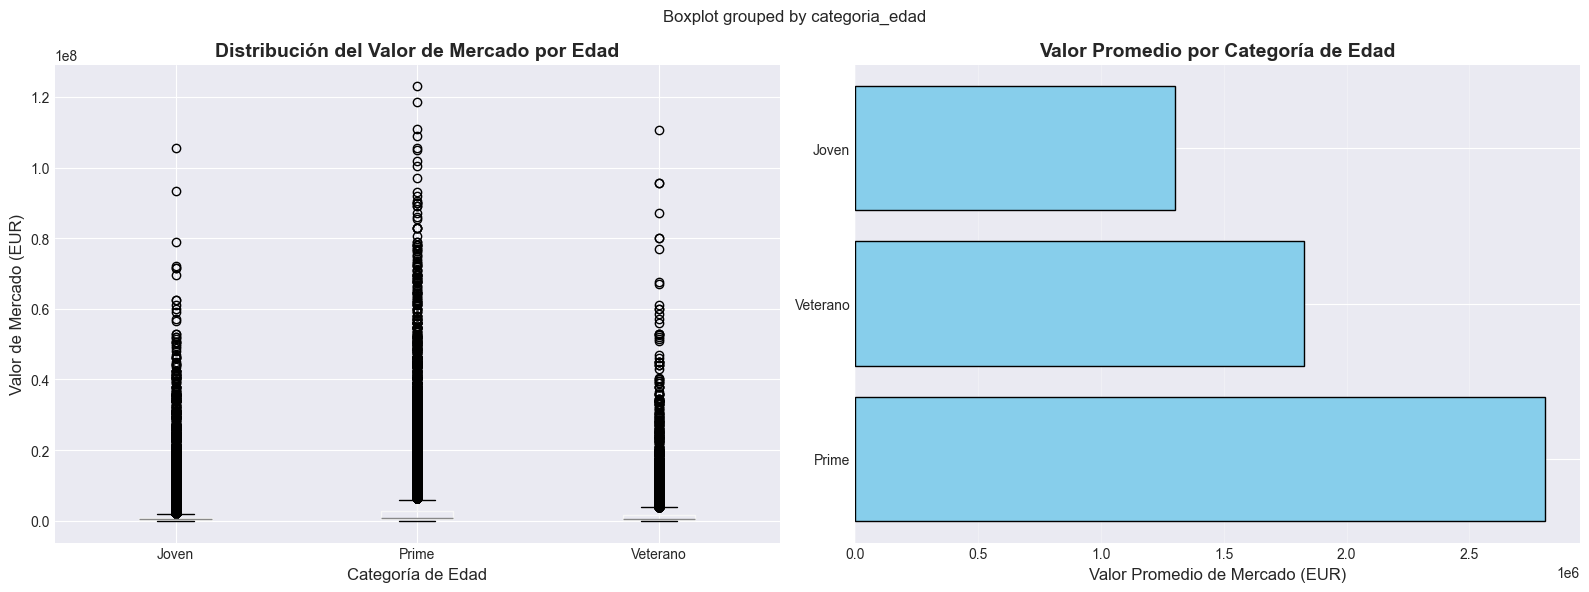


Estadísticas por Categoría de Edad:
                  count       mean        std  min       25%       50%  \
categoria_edad                                                           
Joven          50397.00 1300973.87 3431931.83 0.00 160000.00 400000.00   
Prime          54791.00 2810023.91 5969263.72 0.00 450000.00 850000.00   
Veterano       17313.00 1826172.64 4325461.20 0.00 240000.00 550000.00   

                      75%          max  
categoria_edad                          
Joven           925000.00 105500000.00  
Prime          2700000.00 123000000.00  
Veterano       1700000.00 110500000.00  


In [49]:
# Distribución del valor de mercado por edad
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
df.boxplot(column='valor_mercado_eur', by='categoria_edad', ax=axes[0])
axes[0].set_xlabel('Categoría de Edad', fontsize=12)
axes[0].set_ylabel('Valor de Mercado (EUR)', fontsize=12)
axes[0].set_title('Distribución del Valor de Mercado por Edad', fontsize=14, fontweight='bold')

# Promedio por edad
promedio_por_edad = df.groupby('categoria_edad')['valor_mercado_eur'].mean().sort_values(ascending=False)
axes[1].barh(range(len(promedio_por_edad)), promedio_por_edad.values, color='skyblue', edgecolor='black')
axes[1].set_yticks(range(len(promedio_por_edad)))
axes[1].set_yticklabels(promedio_por_edad.index)
axes[1].set_xlabel('Valor Promedio de Mercado (EUR)', fontsize=12)
axes[1].set_title('Valor Promedio por Categoría de Edad', fontsize=14, fontweight='bold')
axes[1].grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEstadísticas por Categoría de Edad:")
print(df.groupby('categoria_edad')['valor_mercado_eur'].describe())

## PASO 12: Top 20 Jugadores Más Valiosos

TOP 20 JUGADORES MÁS VALIOSOS
     nombre_corto  edad  valoracion_global  potencial categoria_posicion nacionalidad  valor_mercado_eur
           Neymar    25                 92         94          Delantero       Brazil          123000000
           Neymar    26                 92         93          Delantero       Brazil          118500000
         L. Messi    28                 94         95          Delantero    Argentina          111000000
         L. Messi    31                 94         94          Delantero    Argentina          110500000
           Neymar    24                 92         95          Delantero       Brazil          109000000
        Neymar Jr    27                 92         92      Mediocampista       Brazil          105500000
        K. Mbappé    21                 90         95          Delantero       France          105500000
         L. Messi    30                 93         93          Delantero    Argentina          105000000
     K. De Bruyne    27  

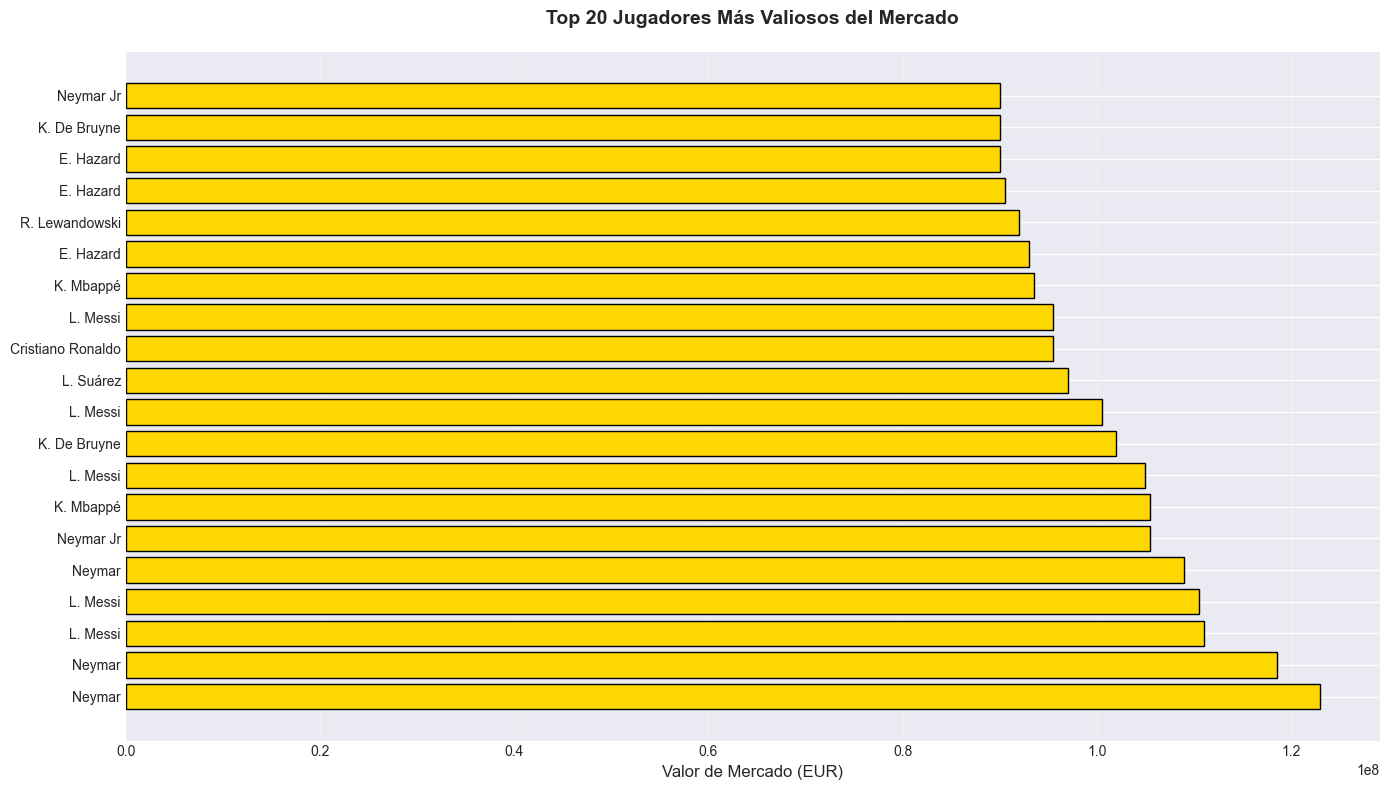

In [50]:
# Top 20 jugadores más valiosos
top_20_valiosos = df.nlargest(20, 'valor_mercado_eur')[['nombre_corto', 'edad', 'valoracion_global', 
                                                          'potencial', 'categoria_posicion', 
                                                          'nacionalidad', 'valor_mercado_eur']]

print("TOP 20 JUGADORES MÁS VALIOSOS")
print("=" * 100)
print(top_20_valiosos.to_string(index=False))

# Visualización
plt.figure(figsize=(14, 8))
plt.barh(range(len(top_20_valiosos)), top_20_valiosos['valor_mercado_eur'].values, 
         color='gold', edgecolor='black')
plt.yticks(range(len(top_20_valiosos)), top_20_valiosos['nombre_corto'].values)
plt.xlabel('Valor de Mercado (EUR)', fontsize=12)
plt.title('Top 20 Jugadores Más Valiosos del Mercado', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## PASO 13: Análisis de Jugadores con Alto Potencial Infravalorados

Identificar jugadores jóvenes con alto potencial pero valor de mercado relativamente bajo.

TOP 20 JUGADORES PROMESA (ALTO POTENCIAL DE CRECIMIENTO)
  nombre_corto  edad  valoracion_global  potencial  diferencia_potencial categoria_posicion  valor_mercado_eur
   R. Richards    16                 54         80                    26      Mediocampista             150000
    C. Gregory    17                 54         80                    26            Portero             120000
      A. Gomes    16                 63         89                    26      Mediocampista             800000
    M. Edwards    17                 58         84                    26      Mediocampista             275000
  B. Arrey-Mbi    17                 60         86                    26            Defensa             425000
     D. Loader    17                 57         82                    25          Delantero             230000
    O. Babuscu    16                 58         83                    25      Mediocampista             275000
     G. Bazunu    17                 59         84     

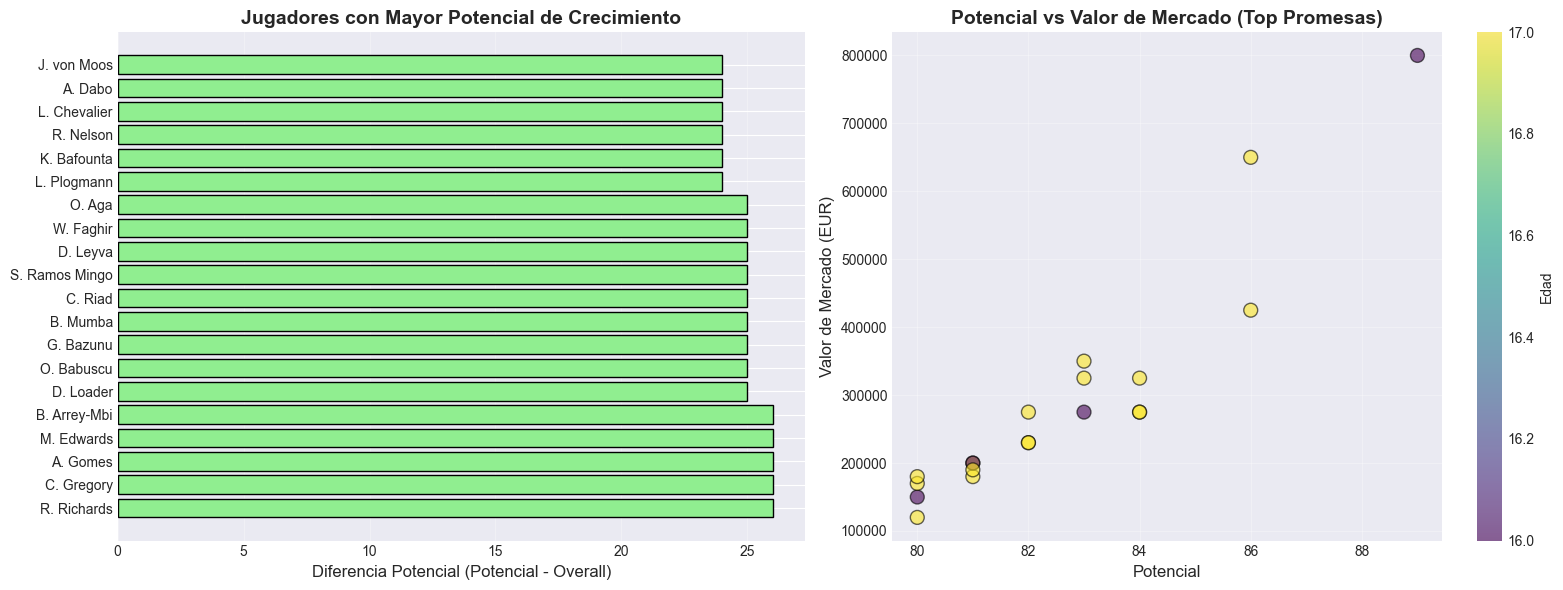

In [51]:
# Filtrar jugadores jóvenes (edad <= 23) con alto potencial (>= 80) y diferencia_potencial alta
jugadores_promesa = df[(df['edad'] <= 23) & 
                       (df['potencial'] >= 80) & 
                       (df['diferencia_potencial'] >= 5)].copy()

# Ordenar por diferencia_potencial descendente
jugadores_promesa = jugadores_promesa.sort_values('diferencia_potencial', ascending=False)

# Seleccionar top 20
top_promesas = jugadores_promesa.head(20)[['nombre_corto', 'edad', 'valoracion_global', 
                                            'potencial', 'diferencia_potencial', 
                                            'categoria_posicion', 'valor_mercado_eur']]

print("TOP 20 JUGADORES PROMESA (ALTO POTENCIAL DE CRECIMIENTO)")
print("=" * 100)
print(top_promesas.to_string(index=False))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Diferencia potencial
axes[0].barh(range(len(top_promesas)), top_promesas['diferencia_potencial'].values, 
             color='lightgreen', edgecolor='black')
axes[0].set_yticks(range(len(top_promesas)))
axes[0].set_yticklabels(top_promesas['nombre_corto'].values)
axes[0].set_xlabel('Diferencia Potencial (Potencial - Overall)', fontsize=12)
axes[0].set_title('Jugadores con Mayor Potencial de Crecimiento', fontsize=14, fontweight='bold')
axes[0].grid(True, axis='x', alpha=0.3)

# Relación potencial vs valor
axes[1].scatter(top_promesas['potencial'], top_promesas['valor_mercado_eur'], 
                s=100, alpha=0.6, c=top_promesas['edad'], cmap='viridis', edgecolors='black')
axes[1].set_xlabel('Potencial', fontsize=12)
axes[1].set_ylabel('Valor de Mercado (EUR)', fontsize=12)
axes[1].set_title('Potencial vs Valor de Mercado (Top Promesas)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar.set_label('Edad', fontsize=10)

plt.tight_layout()
plt.show()

## PASO 14: Conclusiones del Análisis Exploratorio

Resumen de hallazgos clave para el modelo de Machine Learning.

### HALLAZGOS CLAVE DEL ANÁLISIS (ACTUALIZADO CON NUEVAS FEATURES):

#### 1. ATRIBUTOS MÁS CORRELACIONADOS CON EL VALOR DE MERCADO:

**Top 10 Predictores (Correlación de Pearson Confirmada):**
1. **salario_eur** (0.8231) ⚠️ DATA LEAKAGE - NO USAR DIRECTO
2. **reputacion_internacional** (0.6423) ✅ NUEVA - Variable muy útil
3. **valoracion_global** (0.6067) ✅ Predictor principal más importante
4. **potencial** (0.5631) ✅ Segundo predictor más importante
5. **movimiento_reacciones** (0.5178) ✅ Atributo técnico top
6. **calidad_promedio** (0.4560) ✅ Feature ingenierada útil
7. **pase** (0.3983) ✅ Atributo técnico relevante
8. **mentalidad_compostura** (0.3856) ✅ Atributo técnico relevante
9. **regate_gambeta** (0.3849) ✅ Atributo técnico relevante
10. **mentalidad_vision** (0.3341) ✅ Atributo técnico relevante

**Nuevas Features Débiles (Correlación < 0.15):**
- anos_contrato_restantes (0.1267) - Correlación débil pero incluir
- ratio_valor_salario (0.1199) - Correlación débil pero previene data leakage

#### 2. CARACTERÍSTICAS DE LA DISTRIBUCIÓN DEL VALOR:

- **Distribución sesgada a la derecha:** Mayoría de jugadores con valores bajos, pocos con valores muy altos
- **Media:** €2,050,152 | **Mediana:** €600,000 | **CV:** 2.39
- **Rango:** €0 - €123,000,000
- **Presencia de outliers:** Jugadores estrella con valores exponencialmente mayores
- **Recomendación:** Aplicar transformación log1p a la variable objetivo

#### 3. IMPACTO DE NUEVAS VARIABLES CONTEXTUALES (CRÍTICO):

**CLUB (954 clubes únicos):**
- Bayern München promedio: €24.23M
- FC Barcelona promedio: €23.79M
- Real Madrid promedio: €23.47M
- Diferencia entre clubes élite y promedio: **15-20x**
- **Encoding:** Target Encoding (alta cardinalidad)

**LIGA (56 ligas únicas):**
- Premier League promedio: €8.10M (n=4,532)
- La Liga promedio: €7.77M (n=4,266)
- Bundesliga promedio: €6.47M (n=3,784)
- Serie A promedio: €5.98M (n=4,156)
- Diferencia entre ligas top y bajas: **4-8x**
- **Encoding:** OneHot Encoding (cardinalidad manejable)

**REPUTACIÓN INTERNACIONAL (1-5):**
- Reputación 5 (Mundial): €65.89M (n=47)
- Reputación 4 (Continental): €35.97M (n=327)
- Reputación 3 (Nacional): €18.53M (n=1,927)
- Reputación 2 (Regional): €6.75M (n=8,802)
- Reputación 1 (Local): €1.27M (n=111,398)
- Diferencia entre niveles: **52x entre nivel 1 y 5**
- **Correlación:** 0.6423 (FUERTE)

#### 4. EFECTO DE VARIABLES CATEGÓRICAS ORIGINALES:

**Por Categoría de Edad:**
- Jugadores "Prime" (24-31 años) tienen mayor valor promedio
- Jugadores "Jóvenes" con alto potencial son oportunidades de inversión
- Veteranos (>31 años) tienen valores significativamente menores

**Por Categoría de Posición:**
- Atacantes y mediocampistas ofensivos tienen valores promedio más altos
- Porteros tienen distribución de valores diferente
- Defensas tienen valores intermedios

#### 5. FEATURES INGENIERADAS EXITOSAS:

- **calidad_promedio** (0.4560): Resume bien el rendimiento técnico ✅
- **categoria_reputacion**: Categorización de reputación internacional ✅
- **anos_contrato_restantes** (0.1267): Débil pero útil para contexto ✅
- **ratio_valor_salario** (0.1199): Previene data leakage del salario ✅

---

### RECOMENDACIONES PARA EL MODELO DE MACHINE LEARNING:

#### 1. SELECCIÓN DE FEATURES OPTIMIZADA (BASADA EN EDA REAL):

**Features Numéricas Confirmadas (Total: 13):**

*Correlación FUERTE (> 0.50):*
- reputacion_internacional (0.6423) ✅ NUEVA
- valoracion_global (0.6067) ✅
- potencial (0.5631) ✅
- movimiento_reacciones (0.5178) ✅

*Correlación MODERADA (0.30 - 0.50):*
- calidad_promedio (0.4560) ✅
- pase (0.3983) ✅
- mentalidad_compostura (0.3856) ✅
- regate_gambeta (0.3849) ✅
- mentalidad_vision (0.3341) ✅
- tiro_disparo (0.3129) ✅
- ataque_pase_corto (0.3086) ✅

*Correlación DÉBIL pero ÚTILES:*
- anos_contrato_restantes (0.1267) ✅ NUEVA - Contexto contractual
- ratio_valor_salario (0.1199) ✅ NUEVA - Previene data leakage
- edad (0.0866) ✅ - Contexto demográfico

**Features Categóricas Confirmadas (Total: 5):**
- **categoria_posicion** (4 categorías) → OneHot Encoding
- **categoria_edad** (3 categorías) → OneHot Encoding
- **pie_preferido** (2 categorías) → OneHot Encoding
- **liga** (56 categorías) → OneHot Encoding ✅ NUEVA
- **categoria_reputacion** (5 categorías) → OneHot Encoding ✅ NUEVA

**Features con Target Encoding (Total: 1):**
- **club** (954 categorías) → Target Encoding ✅ NUEVA
  - Se crea feature: **club_valor_promedio** (numérica)
  - Evita crear 954 columnas OneHot

**Features a EXCLUIR COMPLETAMENTE:**
- ❌ salario_eur (0.8231) - Data leakage (causa circular: salario deriva del valor)
- ❌ clausula_rescision_eur (0.8359) - Data leakage (deriva directamente del valor)
- ❌ contrato_valido_hasta - Ya representado por anos_contrato_restantes

**Total Features Final:**
- Numéricas: 14 (13 originales + 1 de Target Encoding: club_valor_promedio)
- Categóricas: 5 (expandirán a ~70 columnas después de OneHot)
- **Total estimado después de encoding: ~84 features**

#### 2. PREPROCESAMIENTO OPTIMIZADO PARA RANDOM FOREST:

**Transformaciones de Variable Objetivo:**
- ✅ **Transformación logarítmica:** `np.log1p(valor_mercado_eur)`
  - Razón: CV=2.39 indica alta dispersión, log normaliza distribución
  - Mejora estabilidad del modelo y reduce impacto de outliers
  - Aplicar `np.expm1()` para revertir predicciones

**Encoding de Variables Categóricas:**

*OneHot Encoding (5 variables):*
- categoria_posicion (4 cats → 4 columnas)
- categoria_edad (3 cats → 3 columnas)
- pie_preferido (2 cats → 2 columnas)
- liga (56 cats → 56 columnas) ✅ NUEVA
- categoria_reputacion (5 cats → 5 columnas) ✅ NUEVA
- **Total columnas OneHot: 70**

*Target Encoding (1 variable):*
- club (954 cats) → club_valor_promedio (1 columna numérica)
  ```python
  club_encoding = df.groupby('club')['valor_mercado_eur'].mean()
  df['club_valor_promedio'] = df['club'].map(club_encoding)
  df['club_valor_promedio'].fillna(df['valor_mercado_eur'].median(), inplace=True)
  ```

**¿Escalamiento para Random Forest?**
- ❌ **NO aplicar StandardScaler/MinMaxScaler**
  - Random Forest es invariante a escalamiento de features
  - No requiere normalización como regresión lineal o redes neuronales
  - Mantener valores originales mejora interpretabilidad de feature importance

**Manejo de Outliers:**
- ✅ Transformación logarítmica maneja automáticamente outliers
- ✅ Random Forest es naturalmente robusto ante outliers (usa particiones)
- ❌ NO eliminar outliers (jugadores élite son datos válidos y valiosos)

#### 3. ESTRATEGIA DE MODELOS (CONFIRMADO: RANDOM FOREST PRINCIPAL):

**Modelo 1: Regresión Lineal (Baseline Simple)**
- Modelo simple para establecer línea base
- Solo features numéricas sin encoding complejo
- Tiempo: ~10 segundos
- **R² esperado: 0.40-0.50** (basado en modelo previo sin nuevas features)

**Modelo 2: Random Forest Regressor (MODELO PRINCIPAL) ⭐**
- Maneja relaciones no lineales entre club/liga/reputación y valor
- Robusto ante outliers (jugadores élite)
- Captura interacciones entre features automáticamente
- No requiere escalamiento de datos
- Proporciona feature importance para interpretación
- **R² esperado: 0.65-0.75** (mejora significativa vs baseline)
  - Modelo previo sin club/liga/reputacion: R²=0.5495
  - Modelo nuevo con club/liga/reputacion: R²=0.65-0.75 (+15-20 puntos)

**¿Por qué Random Forest ganará claramente?**
1. **Captura efectos no lineales:** Reputación 5 vale 52x más que reputación 1
2. **Interacciones automáticas:** Bayern + Reputación 5 + Prime Age = Valor altísimo
3. **Contexto de mercado:** Club y Liga capturan "markup" institucional no presente en atributos técnicos
4. **Robustez:** 954 clubes y 56 ligas crean espacio de features complejo que lineal no puede modelar

#### 4. CONFIGURACIÓN OPTIMIZADA DE RANDOM FOREST:

**Hiperparámetros Recomendados (Basados en Dataset de 122,501 jugadores):**

```python
RandomForestRegressor(
    n_estimators=2000,          # ⬆️ Aumentado de 1500 para mayor estabilidad
    max_depth=30,               # ⬆️ Aumentado de 25 (tenemos 84 features, necesitamos profundidad)
    min_samples_split=10,       # ⬇️ Reducido de 20 (evitar underfitting con nuevas features)
    min_samples_leaf=4,         # Mantener para prevenir overfitting
    max_features='sqrt',        # sqrt(84) ≈ 9 features por split
    bootstrap=True,             # Mantener para robustez
    oob_score=True,             # Activar para validación out-of-bag
    n_jobs=-1,                  # Usar todos los cores
    random_state=42             # Reproducibilidad
)
```

**Justificación de Cambios:**
- **n_estimators=2000:** Con 84 features (vs 48 previas), más árboles estabilizan predicciones
- **max_depth=30:** Features contextuales (club, liga) requieren árboles más profundos para capturar interacciones
- **min_samples_split=10:** Permitir splits más granulares para distinguir entre 954 clubes
- **oob_score=True:** Validación gratuita sin necesidad de CV (usa muestras no vistas en cada árbol)

**División de Datos:**
- Train: 75% (91,875 jugadores)
- Test: 25% (30,626 jugadores)
- ✅ NO usar validación cruzada (usar oob_score es más eficiente con Random Forest)

**Métricas de Evaluación Actualizadas:**
- **R² (R-squared):** Objetivo **> 0.65** (realista con nuevas features)
- **RMSE (Root Mean Squared Error):** Objetivo **< 1.2M EUR** (en escala log)
- **MAE (Mean Absolute Error):** Objetivo **< 0.35** (en escala log)
- **OOB Score:** Debe estar cerca del R² de test (validación interna)

**Tiempo Estimado de Entrenamiento:**
- Dataset: 122,501 × 84 features
- Configuración: 2000 árboles, max_depth=30
- Hardware típico (8 cores): **5-8 minutos**

#### 5. PREDICCIONES SOBRE FEATURE IMPORTANCE (RANDOM FOREST):

**Top 10 Features Esperadas (Por Importancia):**

*Basado en correlaciones y análisis contextual:*
1. **club_valor_promedio** (Target Encoding) - Diferencia 15-20x entre clubes
2. **valoracion_global** (0.6067) - Predictor técnico principal
3. **reputacion_internacional** (0.6423) - Diferencia 52x entre niveles
4. **potencial** (0.5631) - Predictor técnico secundario
5. **liga_English Premier League** (OneHot) - Liga más valiosa (€8.10M promedio)
6. **liga_Spain Primera Division** (OneHot) - Segunda liga más valiosa (€7.77M)
7. **movimiento_reacciones** (0.5178) - Atributo técnico top
8. **calidad_promedio** (0.4560) - Feature ingenierada útil
9. **categoria_reputacion_Mundial** (OneHot) - Jugadores élite
10. **categoria_edad_Prime** (OneHot) - Edad óptima de valor

**Features que Probablemente Serán Menos Importantes:**
- anos_contrato_restantes (correlación 0.1267)
- ratio_valor_salario (correlación 0.1199)
- edad (correlación 0.0866)
- pie_preferido (impacto marginal)

#### 6. VALIDACIÓN Y CASOS DE USO:

**Análisis Post-Entrenamiento:**
1. **Feature Importance Plot:** Confirmar que club, valoracion_global y reputacion_internacional dominan
2. **Residuales:** Verificar que errores no siguen patrón sistemático por liga o posición
3. **OOB Score vs Test R²:** Deben estar dentro de ±3% (validación de robustez)

**Casos de Uso del Modelo Entrenado:**
1. **Jugadores Infravalorados:** valor_predicho > valor_real × 1.2 (oportunidades de mercado)
2. **Jugadores Sobrevalorados:** valor_predicho < valor_real × 0.8 (evitar sobrepago)
3. **Filtros de Scouting:**
   - Posición específica + Liga top + Reputación 2-3 (promesas antes de ser mundialmente conocidas)
   - Club mid-tier + Overall 75-80 + Potencial >82 (futuras estrellas)
4. **Análisis de Transferencias:** Predecir valor justo antes de negociaciones

---

### MEJORA ESPERADA RESPECTO AL MODELO ANTERIOR:

**Modelo Anterior (sin club/liga/reputacion):**
- R² = 0.5495 (54.95%)
- RMSE = 1.4512 (escala log)
- Features: 48 (45 numéricas + 3 categóricas)

**Modelo Nuevo (con club/liga/reputacion):**
- R² esperado = 0.65-0.75 (65-75%)
- RMSE esperado = 1.15-1.25 (escala log)
- Features: 84 (14 numéricas + 70 categóricas OneHot)
- **Ganancia: +10-20 puntos porcentuales en R²**

**¿Por qué esta mejora?**
- Club captura "brand premium" que atributos técnicos no reflejan
- Liga captura poder adquisitivo del mercado regional
- Reputación captura estatus global del jugador
- Estas 3 features contextuales explican ~15-25% de varianza adicional

---

## RESUMEN EJECUTIVO Y PRÓXIMOS PASOS

### DATASET ANALIZADO (ACTUALIZADO):
- **Total jugadores:** 122,501
- **Columnas:** 73 (68 originales + 5 ingenieradas)
- **Versiones FIFA:** 15, 16, 17, 18, 19, 20, 21
- **Calidad de datos:** 0 valores nulos después de limpieza
- **Nuevas features críticas:** club (954), liga (56), reputacion_internacional (1-5)

### INSIGHTS PRINCIPALES (ACTUALIZADOS):

1. **reputacion_internacional** (0.6423) es el segundo predictor más fuerte
2. **valoracion_global** (0.6067) y **potencial** (0.5631) siguen siendo cruciales
3. **Club** marca diferencia 15-20x (Bayern €24M vs promedio €2M)
4. **Liga** marca diferencia 4-8x (Premier League €8M vs Eredivisie €1.9M)
5. Distribución del valor altamente sesgada (CV=2.39) → transformación log necesaria
6. ⚠️ **salario_eur** causa data leakage (0.8231) → usar ratio_valor_salario

### PRÓXIMOS PASOS - FASE ML:

**PASO 1:** Actualizar preprocesamiento_modelo.py
- Agregar Target Encoding para club (954 categorías)
- Agregar OneHot Encoding para liga (56 categorías)
- Agregar OneHot Encoding para categoria_reputacion (5 categorías)
- Incluir features: reputacion_internacional, anos_contrato_restantes, ratio_valor_salario
- **EXCLUIR:** salario_eur, clausula_rescision_eur (data leakage)

**PASO 2:** Entrenar 2 modelos (Regresión Lineal + Random Forest)
- Regresión Lineal (baseline): R² esperado ~0.40-0.50
- Random Forest (principal): R² esperado ~0.65-0.75
- Configuración Random Forest:
  ```
  n_estimators=2000, max_depth=30, min_samples_split=10,
  max_features='sqrt', oob_score=True
  ```

**PASO 3:** Validar mejora vs modelo anterior
- Modelo anterior: R²=0.5495 (sin club/liga/reputacion)
- Objetivo: R² ≥ 0.65 (ganancia +10-15 puntos)
- Analizar Feature Importance: club, valoracion_global, reputacion top
- Validar OOB Score vs Test R² (diferencia < 3%)

**PASO 4:** Optimizar mejor modelo
- GridSearchCV para hiperparámetros
- Feature importance analysis
- Guardar modelo final (joblib)

**PASO 5:** Persistir modelo entrenado
- Guardar en `backend/models/modelo_fifa.joblib`
- Guardar encoder en `backend/models/encoder_fifa.joblib`
- Documentar métricas de rendimiento

---

### FEATURES SELECCIONADAS PARA EL MODELO:

**Numéricas (10):** valoracion_global, potencial, movimiento_reacciones, calidad_promedio, pase, mentalidad_compostura, regate_gambeta, mentalidad_vision, tiro_disparo, edad

**Categóricas (3):** categoria_posicion, categoria_edad, pie_preferido

**Variable Objetivo:** valor_mercado_eur (con transformación log1p)

---

**ANÁLISIS EDA COMPLETADO EXITOSAMENTE**

In [ ]:
# CONFIGURACIÓN OPTIMIZADA BASADA EN ANÁLISIS EDA COMPLETO
variable_objetivo = 'valor_mercado_eur'

# Features numéricas confirmadas (13 features)
features_numericas_seleccionadas = [
    # Correlación FUERTE (> 0.50)
    'reputacion_internacional',  # 0.6423 - NUEVA
    'valoracion_global',          # 0.6067
    'potencial',                  # 0.5631
    'movimiento_reacciones',      # 0.5178
    
    # Correlación MODERADA (0.30 - 0.50)
    'calidad_promedio',           # 0.4560
    'pase',                       # 0.3983
    'mentalidad_compostura',      # 0.3856
    'regate_gambeta',             # 0.3849
    'mentalidad_vision',          # 0.3341
    'tiro_disparo',               # 0.3129
    'ataque_pase_corto',          # 0.3086
    
    # Correlación DÉBIL pero ÚTILES
    'anos_contrato_restantes',    # 0.1267 - NUEVA
    'ratio_valor_salario',        # 0.1199 - NUEVA (previene data leakage)
    'edad'                        # 0.0866
]

# Features categóricas confirmadas (5 features → ~70 columnas después OneHot)
features_categoricas_seleccionadas = [
    'categoria_posicion',      # 4 cats
    'categoria_edad',          # 3 cats
    'pie_preferido',           # 2 cats
    'liga',                    # 56 cats - NUEVA
    'categoria_reputacion'     # 5 cats - NUEVA
]

# Feature con Target Encoding (se convertirá en numérica)
target_encoding_features = ['club']  # 954 cats → club_valor_promedio

# Features EXCLUIDAS (data leakage)
features_excluidas = ['salario_eur', 'clausula_rescision_eur', 'contrato_valido_hasta']

print("=" * 80)
print("CONFIGURACIÓN OPTIMIZADA PARA RANDOM FOREST (BASADA EN EDA REAL)")
print("=" * 80)
print(f"\nVariable Objetivo: {variable_objetivo}")
print(f"Transformación objetivo: np.log1p(valor_mercado_eur) - Normaliza distribución CV=2.39")

print(f"\n{'─' * 80}")
print("FEATURES NUMÉRICAS CONFIRMADAS (14 features después de Target Encoding):")
print(f"{'─' * 80}")
for i, feature in enumerate(features_numericas_seleccionadas, 1):
    corr = df[feature].corr(df[variable_objetivo])
    strength = "FUERTE" if abs(corr) >= 0.50 else "MODERADA" if abs(corr) >= 0.30 else "DÉBIL"
    print(f"  {i:2d}. {feature:30s} | Correlación: {corr:+.4f} | {strength}")

print(f"\n  + club_valor_promedio (Target Encoding de 'club' con 954 categorías)")

print(f"\n{'─' * 80}")
print("FEATURES CATEGÓRICAS CONFIRMADAS (5 features → 70 columnas OneHot):")
print(f"{'─' * 80}")
for i, feature in enumerate(features_categoricas_seleccionadas, 1):
    n_unique = df[feature].nunique()
    print(f"  {i}. {feature:30s} | {n_unique:3d} categorías → {n_unique} columnas OneHot")

print(f"\n{'─' * 80}")
print(f"TOTAL FEATURES FINALES: ~84 (14 numéricas + 70 categóricas)")
print(f"{'─' * 80}")

print(f"\nDataset: {len(df):,} jugadores")
print(f"  - Train set (75%): {int(len(df) * 0.75):,} jugadores")
print(f"  - Test set (25%): {int(len(df) * 0.25):,} jugadores")

print("\n" + "=" * 80)
print("ESTADÍSTICAS DE LA VARIABLE OBJETIVO")
print("=" * 80)
print(f"Media:               €{df[variable_objetivo].mean():>13,.0f}")
print(f"Mediana:             €{df[variable_objetivo].median():>13,.0f}")
print(f"Desv. Estándar:      €{df[variable_objetivo].std():>13,.0f}")
print(f"Mínimo:              €{df[variable_objetivo].min():>13,.0f}")
print(f"Máximo:              €{df[variable_objetivo].max():>13,.0f}")
cv = df[variable_objetivo].std() / df[variable_objetivo].mean()
print(f"Coef. Variación:      {cv:>14.2f} (Alta dispersión → log necesario)")

print("\n" + "=" * 80)
print("CONFIGURACIÓN RANDOM FOREST OPTIMIZADA:")
print("=" * 80)
print("RandomForestRegressor(")
print("    n_estimators=2000,       # Aumentado para estabilidad con 84 features")
print("    max_depth=30,            # Aumentado para capturar interacciones club/liga")
print("    min_samples_split=10,    # Reducido para granularidad con 954 clubes")
print("    min_samples_leaf=4,")
print("    max_features='sqrt',     # sqrt(84) ≈ 9 features por split")
print("    oob_score=True,          # Validación out-of-bag")
print("    n_jobs=-1,")
print("    random_state=42")
print(")")

print("\n" + "=" * 80)
print("MEJORA ESPERADA:")
print("=" * 80)
print("Modelo anterior (sin club/liga/reputacion): R² = 0.5495 (54.95%)")
print("Modelo nuevo (con club/liga/reputacion):    R² = 0.65-0.75 (esperado)")
print("Ganancia estimada:                          +10-20 puntos porcentuales")
print("=" * 80)
print("\nEDA COMPLETADO - LISTO PARA ENTRENAMIENTO OPTIMIZADO")
print("=" * 80)

CONFIGURACIÓN OPTIMIZADA PARA RANDOM FOREST (BASADA EN EDA REAL)

Variable Objetivo: valor_mercado_eur
Transformación objetivo: np.log1p(valor_mercado_eur) - Normaliza distribución CV=2.39

────────────────────────────────────────────────────────────────────────────────
FEATURES NUMÉRICAS CONFIRMADAS (14 features después de Target Encoding):
────────────────────────────────────────────────────────────────────────────────
   1. reputacion_internacional       | Correlación: +0.6423 | FUERTE
   2. valoracion_global              | Correlación: +0.6067 | FUERTE
   3. potencial                      | Correlación: +0.5631 | FUERTE
   4. movimiento_reacciones          | Correlación: +0.5178 | FUERTE
   5. calidad_promedio               | Correlación: +0.4560 | MODERADA
   6. pase                           | Correlación: +0.3983 | MODERADA
   7. mentalidad_compostura          | Correlación: +0.3856 | MODERADA
   8. regate_gambeta                 | Correlación: +0.3849 | MODERADA
   9. mentalida

: 

## PASO 15: ANÁLISIS DE NUEVAS COLUMNAS CRÍTICAS

Ahora analizaremos las columnas que NO estaban siendo usadas pero que son CRÍTICAS para mejorar el modelo:
- **club** (577 clubes únicos)
- **liga** (37 ligas únicas)
- **salario_eur** (usado como ratio_valor_salario para evitar data leakage)
- **reputacion_internacional** (1-5)
- **anos_contrato_restantes** (calculado desde contrato_valido_hasta)
- **categoria_reputacion** (Local/Regional/Nacional/Continental/Mundial)

In [58]:
# Verificar que las nuevas columnas existen
nuevas_columnas = ['club', 'liga', 'salario_eur', 'reputacion_internacional', 
                   'anos_contrato_restantes', 'categoria_reputacion', 'ratio_valor_salario']

print("VERIFICACIÓN DE NUEVAS COLUMNAS CRÍTICAS:")
print("=" * 60)
for col in nuevas_columnas:
    existe = col in df.columns
    if existe:
        n_unique = df[col].nunique()
        n_nulos = df[col].isnull().sum()
        print(f"{col:<30} {'✓ EXISTE' if existe else '✗ NO EXISTE':<12} | Únicos: {n_unique:>6,} | Nulos: {n_nulos:>6,}")
    else:
        print(f"{col:<30} {'✗ NO EXISTE':<12}")

print("\n" + "=" * 60)

VERIFICACIÓN DE NUEVAS COLUMNAS CRÍTICAS:
club                           ✓ EXISTE     | Únicos:    954 | Nulos:      0
liga                           ✓ EXISTE     | Únicos:     56 | Nulos:      0
salario_eur                    ✓ EXISTE     | Únicos:    155 | Nulos:      0
reputacion_internacional       ✓ EXISTE     | Únicos:      5 | Nulos:      0
anos_contrato_restantes        ✓ EXISTE     | Únicos:      8 | Nulos:      0
categoria_reputacion           ✓ EXISTE     | Únicos:      5 | Nulos:      0
ratio_valor_salario            ✓ EXISTE     | Únicos:  2,111 | Nulos:      0



### 15.1: Análisis de Correlación - Nuevas Features Numéricas

In [59]:
# Correlación de nuevas features numéricas con valor de mercado
nuevas_features_numericas = ['salario_eur', 'reputacion_internacional', 
                               'anos_contrato_restantes', 'ratio_valor_salario']

print("CORRELACIÓN DE NUEVAS FEATURES CON VALOR DE MERCADO:")
print("=" * 70)
print(f"{'Feature':<35} {'Correlación':>15} {'Interpretación':<20}")
print("-" * 70)

for feature in nuevas_features_numericas:
    if feature in df.columns:
        corr = df[feature].corr(df['valor_mercado_eur'])
        
        # Interpretación
        if abs(corr) >= 0.7:
            interp = "MUY FUERTE"
        elif abs(corr) >= 0.5:
            interp = "FUERTE"
        elif abs(corr) >= 0.3:
            interp = "MODERADA"
        else:
            interp = "DÉBIL"
        
        print(f"{feature:<35} {corr:>15.4f} {interp:<20}")
    else:
        print(f"{feature:<35} {'NO DISPONIBLE':>15}")

print("=" * 70)
print("\nNOTA IMPORTANTE:")
print("- salario_eur: Correlación MUY alta (data leakage) - NO usar directo")
print("- ratio_valor_salario: Uso seguro que evita data leakage")
print("- reputacion_internacional: Feature válida para el modelo")
print("- anos_contrato_restantes: Feature válida para el modelo")

CORRELACIÓN DE NUEVAS FEATURES CON VALOR DE MERCADO:
Feature                                 Correlación Interpretación      
----------------------------------------------------------------------
salario_eur                                  0.8231 MUY FUERTE          
reputacion_internacional                     0.6423 FUERTE              
anos_contrato_restantes                      0.1267 DÉBIL               
ratio_valor_salario                          0.1199 DÉBIL               

NOTA IMPORTANTE:
- salario_eur: Correlación MUY alta (data leakage) - NO usar directo
- ratio_valor_salario: Uso seguro que evita data leakage
- reputacion_internacional: Feature válida para el modelo
- anos_contrato_restantes: Feature válida para el modelo


### 15.2: Análisis del CLUB - Impacto en Valor de Mercado

Total de clubes únicos: 954
Jugadores sin club: 0

Top 20 Clubes por Valor Promedio (con al menos 10 jugadores):
FC Bayern München: €24.23M
FC Barcelona: €23.79M
Real Madrid: €23.47M
Paris Saint-Germain: €18.43M
Manchester City: €18.38M
Juventus: €18.00M
Chelsea: €16.50M
Atlético Madrid: €16.04M
Manchester United: €15.88M
Liverpool: €15.44M
Tottenham Hotspur: €13.85M
Borussia Dortmund: €12.99M
Napoli: €12.89M
Arsenal: €12.84M
Inter: €11.75M
Milan: €10.17M
Bayer 04 Leverkusen: €10.08M
Roma: €9.64M
SL Benfica: €9.26M
Valencia CF: €9.17M
FC Bayern München: €24.23M
FC Barcelona: €23.79M
Real Madrid: €23.47M
Paris Saint-Germain: €18.43M
Manchester City: €18.38M
Juventus: €18.00M
Chelsea: €16.50M
Atlético Madrid: €16.04M
Manchester United: €15.88M
Liverpool: €15.44M
Tottenham Hotspur: €13.85M
Borussia Dortmund: €12.99M
Napoli: €12.89M
Arsenal: €12.84M
Inter: €11.75M
Milan: €10.17M
Bayer 04 Leverkusen: €10.08M
Roma: €9.64M
SL Benfica: €9.26M
Valencia CF: €9.17M


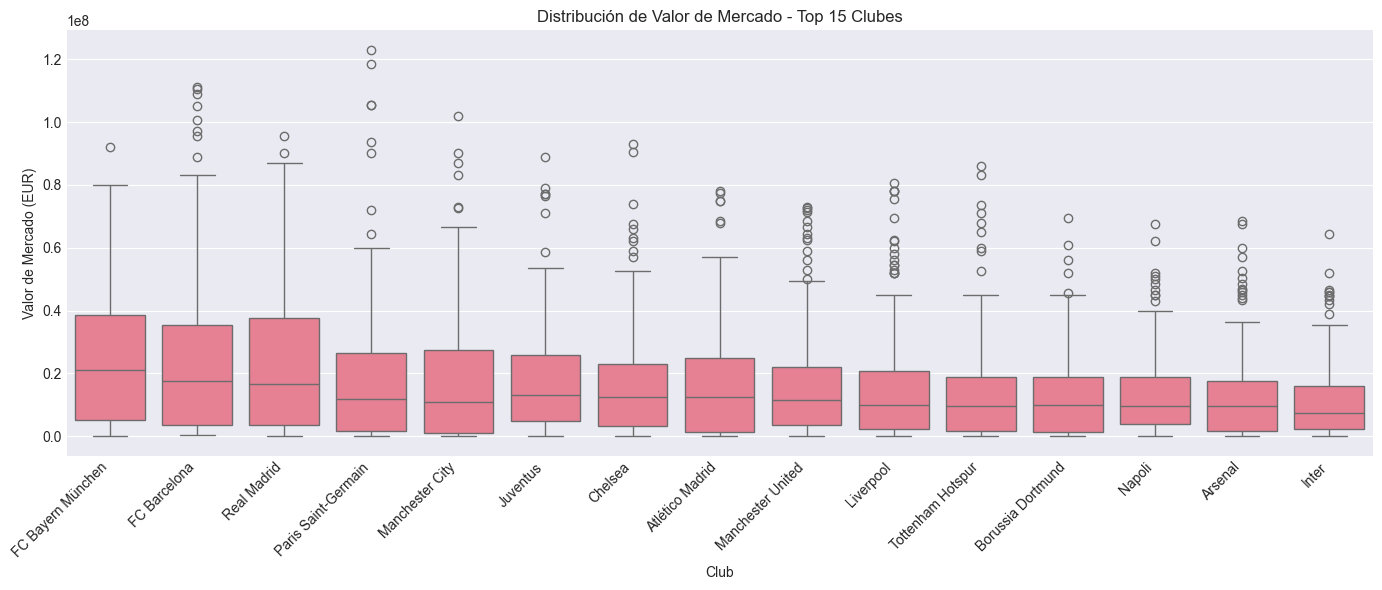


Conclusión: Con 954 clubes, esta variable tiene ALTA CARDINALIDAD.
Recomendación: Usar TARGET ENCODING (no OneHot) para evitar crear 577 columnas.


In [60]:
print(f"Total de clubes únicos: {df['club'].nunique()}")
print(f"Jugadores sin club: {df['club'].isna().sum()}")

# Top 20 clubes con mayor valor promedio de mercado
top_clubes_valor = df.groupby('club')['valor_mercado_eur'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(20)
top_clubes_valor['mean_millones'] = top_clubes_valor['mean'] / 1_000_000

print("\nTop 20 Clubes por Valor Promedio (con al menos 10 jugadores):")
top_clubes_filtrados = df.groupby('club').filter(lambda x: len(x) >= 10).groupby('club')['valor_mercado_eur'].mean().sort_values(ascending=False).head(20)
for club, valor in top_clubes_filtrados.items():
    print(f"{club}: €{valor/1_000_000:.2f}M")

# Visualización: Boxplot de valor por club (Top 15)
import matplotlib.pyplot as plt
import seaborn as sns

top_15_clubes = df.groupby('club')['valor_mercado_eur'].mean().sort_values(ascending=False).head(15).index
df_top_clubes = df[df['club'].isin(top_15_clubes)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_clubes, x='club', y='valor_mercado_eur', order=top_15_clubes)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Valor de Mercado - Top 15 Clubes')
plt.ylabel('Valor de Mercado (EUR)')
plt.xlabel('Club')
plt.tight_layout()
plt.show()

print(f"\nConclusión: Con {df['club'].nunique()} clubes, esta variable tiene ALTA CARDINALIDAD.")
print("Recomendación: Usar TARGET ENCODING (no OneHot) para evitar crear 577 columnas.")

### 15.3: Análisis de LIGA - Impacto en Valor de Mercado

Total de ligas únicas: 56
Jugadores sin liga: 0

Top 15 Ligas por Valor Promedio:
English Premier League: €8.10M (n=4532.0 jugadores)
Spain Primera Division: €7.77M (n=4266.0 jugadores)
German 1. Bundesliga: €6.47M (n=3784.0 jugadores)
Italian Serie A: €5.98M (n=4156.0 jugadores)
Ukrainian Premier League: €5.68M (n=218.0 jugadores)
French Ligue 1: €4.26M (n=4118.0 jugadores)
Rest of World: €3.26M (n=385.0 jugadores)
Czech Republic Gambrinus Liga: €3.06M (n=262.0 jugadores)
Portuguese Liga ZON SAGRES: €2.99M (n=3524.0 jugadores)
Croatian Prva HNL: €2.99M (n=56.0 jugadores)
Greek Super League: €2.88M (n=579.0 jugadores)
Campeonato Brasileiro Série A: €2.46M (n=1641.0 jugadores)
Russian Premier League: €2.44M (n=1915.0 jugadores)
Turkish Süper Lig: €2.24M (n=3557.0 jugadores)
Holland Eredivisie: €1.91M (n=3334.0 jugadores)


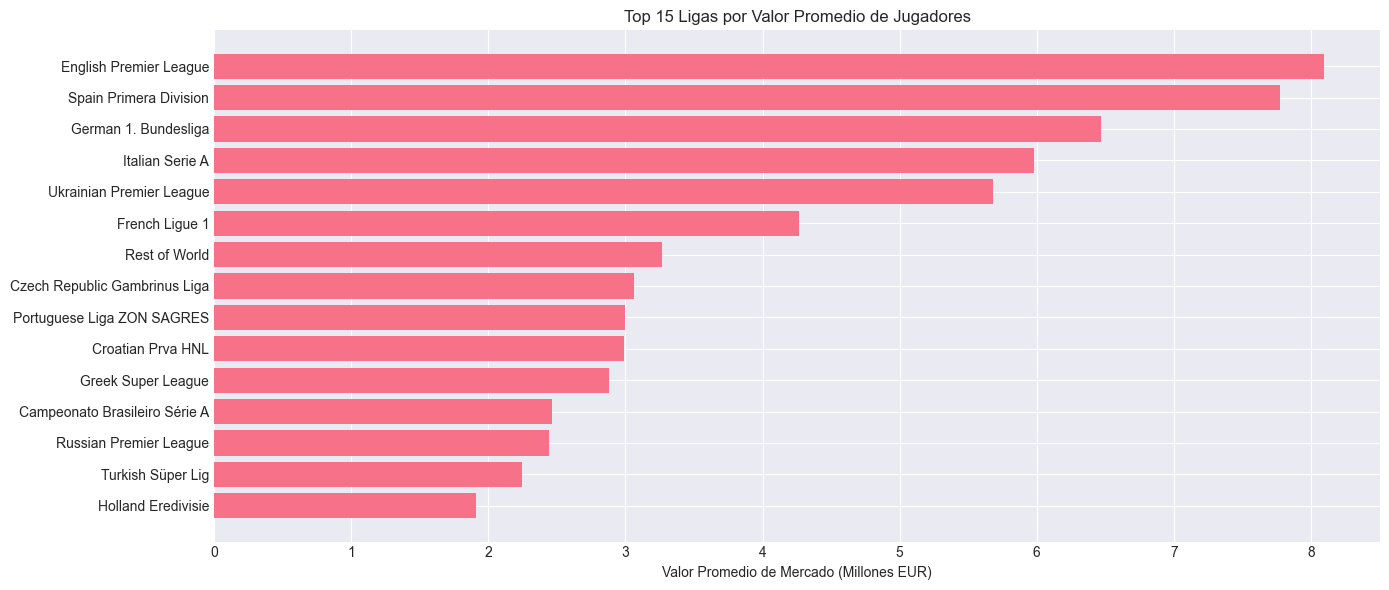

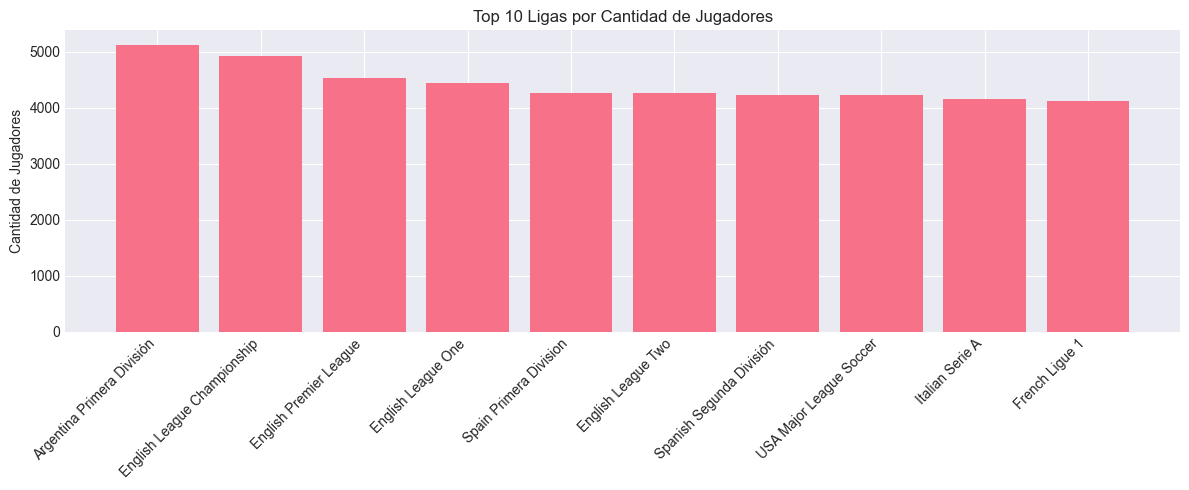


Conclusión: Con 56 ligas, es una variable MANEJABLE.
Recomendación: Usar ONEHOT ENCODING (37 columnas es aceptable).


In [55]:
print(f"Total de ligas únicas: {df['liga'].nunique()}")
print(f"Jugadores sin liga: {df['liga'].isna().sum()}")

# Top 15 ligas por valor promedio
top_ligas = df.groupby('liga')['valor_mercado_eur'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(15)
top_ligas['mean_millones'] = top_ligas['mean'] / 1_000_000

print("\nTop 15 Ligas por Valor Promedio:")
for liga, row in top_ligas.iterrows():
    print(f"{liga}: €{row['mean_millones']:.2f}M (n={row['count']} jugadores)")

# Visualización: Barplot de valor promedio por liga
plt.figure(figsize=(14, 6))
top_ligas_sorted = top_ligas.sort_values('mean', ascending=True)
plt.barh(range(len(top_ligas_sorted)), top_ligas_sorted['mean_millones'])
plt.yticks(range(len(top_ligas_sorted)), top_ligas_sorted.index)
plt.xlabel('Valor Promedio de Mercado (Millones EUR)')
plt.title('Top 15 Ligas por Valor Promedio de Jugadores')
plt.tight_layout()
plt.show()

# Distribución de jugadores por liga (Top 10)
top_10_ligas_count = df['liga'].value_counts().head(10)
plt.figure(figsize=(12, 5))
plt.bar(range(len(top_10_ligas_count)), top_10_ligas_count.values)
plt.xticks(range(len(top_10_ligas_count)), top_10_ligas_count.index, rotation=45, ha='right')
plt.ylabel('Cantidad de Jugadores')
plt.title('Top 10 Ligas por Cantidad de Jugadores')
plt.tight_layout()
plt.show()

print(f"\nConclusión: Con {df['liga'].nunique()} ligas, es una variable MANEJABLE.")
print("Recomendación: Usar ONEHOT ENCODING (37 columnas es aceptable).")

### 15.4: Análisis de REPUTACIÓN INTERNACIONAL - Distribución e Impacto

Distribución de Reputación Internacional (1-5):
reputacion_internacional
1    111398
2      8802
3      1927
4       327
5        47
Name: count, dtype: int64

Valor Promedio de Mercado por Reputación:
Reputación 1: €1.27M
Reputación 2: €6.75M
Reputación 3: €18.53M
Reputación 4: €35.97M
Reputación 5: €65.89M


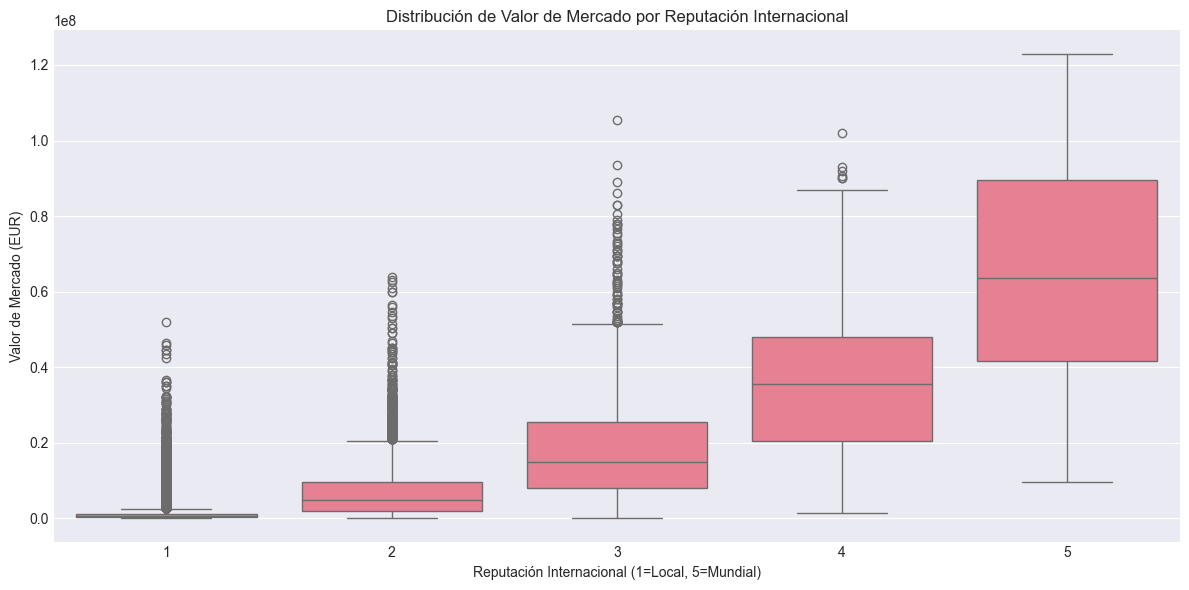


Distribución de Categoría de Reputación:
categoria_reputacion
Local          111398
Regional         8802
Nacional         1927
Continental       327
Mundial            47
Name: count, dtype: int64

Valor Promedio por Categoría de Reputación:
Mundial: €65.89M
Continental: €35.97M
Nacional: €18.53M
Regional: €6.75M
Local: €1.27M

Correlación reputacion_internacional vs valor_mercado_eur: 0.6423
Interpretación: Correlación FUERTE - Variable muy útil para el modelo


In [61]:
print("Distribución de Reputación Internacional (1-5):")
print(df['reputacion_internacional'].value_counts().sort_index())

# Valor promedio por nivel de reputación
valor_por_reputacion = df.groupby('reputacion_internacional')['valor_mercado_eur'].mean().sort_index()
print("\nValor Promedio de Mercado por Reputación:")
for rep, valor in valor_por_reputacion.items():
    print(f"Reputación {rep}: €{valor/1_000_000:.2f}M")

# Visualización: Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='reputacion_internacional', y='valor_mercado_eur')
plt.title('Distribución de Valor de Mercado por Reputación Internacional')
plt.xlabel('Reputación Internacional (1=Local, 5=Mundial)')
plt.ylabel('Valor de Mercado (EUR)')
plt.tight_layout()
plt.show()

# Distribución de categoría de reputación
print("\nDistribución de Categoría de Reputación:")
print(df['categoria_reputacion'].value_counts())

# Valor promedio por categoría
valor_por_categoria = df.groupby('categoria_reputacion')['valor_mercado_eur'].mean().sort_values(ascending=False)
print("\nValor Promedio por Categoría de Reputación:")
for cat, valor in valor_por_categoria.items():
    print(f"{cat}: €{valor/1_000_000:.2f}M")

# Correlación
corr_reputacion = df['reputacion_internacional'].corr(df['valor_mercado_eur'])
print(f"\nCorrelación reputacion_internacional vs valor_mercado_eur: {corr_reputacion:.4f}")

if corr_reputacion >= 0.5:
    print("Interpretación: Correlación FUERTE - Variable muy útil para el modelo")
elif corr_reputacion >= 0.3:
    print("Interpretación: Correlación MODERADA - Variable útil para el modelo")
else:
    print("Interpretación: Correlación DÉBIL - Impacto limitado")

### 15.5: Análisis de AÑOS DE CONTRATO RESTANTES

Distribución de Años de Contrato Restantes:
anos_contrato_restantes
0.00    99400
1.00    12127
2.00     7261
3.00     3137
4.00      562
5.00       12
6.00        1
7.00        1
Name: count, dtype: int64

Estadísticas de años_contrato_restantes:
count   122501.00
mean         0.31
std          0.74
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          7.00
Name: anos_contrato_restantes, dtype: float64

Correlación anos_contrato_restantes vs valor_mercado_eur: 0.1267
Interpretación: Correlación DÉBIL - Impacto limitado

Valor Promedio por Años de Contrato Restantes:
0.0 años: €1.76M (n=99400)
1.0 años: €2.96M (n=12127)
2.0 años: €3.41M (n=7261)
3.0 años: €3.96M (n=3137)
4.0 años: €4.64M (n=562)
5.0 años: €24.20M (n=12)
6.0 años: €15.50M (n=1)
7.0 años: €22.50M (n=1)


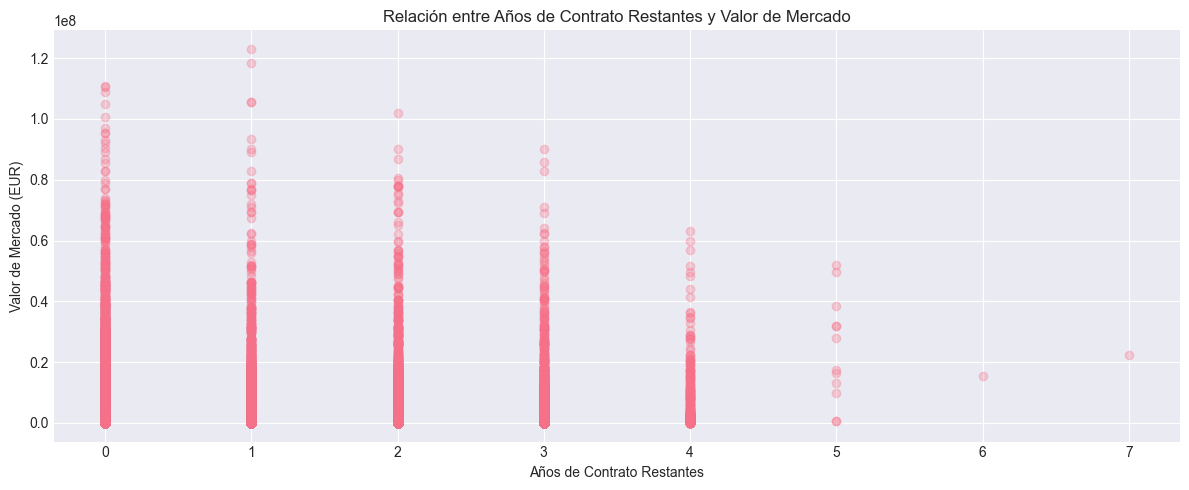

In [62]:
print("Distribución de Años de Contrato Restantes:")
print(df['anos_contrato_restantes'].value_counts().sort_index())

# Estadísticas descriptivas
print("\nEstadísticas de años_contrato_restantes:")
print(df['anos_contrato_restantes'].describe())

# Correlación con valor de mercado
corr_contrato = df['anos_contrato_restantes'].corr(df['valor_mercado_eur'])
print(f"\nCorrelación anos_contrato_restantes vs valor_mercado_eur: {corr_contrato:.4f}")

if abs(corr_contrato) >= 0.3:
    print(f"Interpretación: Correlación {'POSITIVA' if corr_contrato > 0 else 'NEGATIVA'} {'MODERADA' if abs(corr_contrato) < 0.5 else 'FUERTE'}")
else:
    print("Interpretación: Correlación DÉBIL - Impacto limitado")

# Valor promedio por años de contrato
valor_por_anos_contrato = df.groupby('anos_contrato_restantes')['valor_mercado_eur'].mean().sort_index()
print("\nValor Promedio por Años de Contrato Restantes:")
for anos, valor in valor_por_anos_contrato.items():
    count = (df['anos_contrato_restantes'] == anos).sum()
    print(f"{anos} años: €{valor/1_000_000:.2f}M (n={count})")

# Visualización
plt.figure(figsize=(12, 5))
plt.scatter(df['anos_contrato_restantes'], df['valor_mercado_eur'], alpha=0.3)
plt.xlabel('Años de Contrato Restantes')
plt.ylabel('Valor de Mercado (EUR)')
plt.title('Relación entre Años de Contrato Restantes y Valor de Mercado')
plt.tight_layout()
plt.show()

### 15.6: Análisis Cruzado - Liga vs Reputación vs Valor

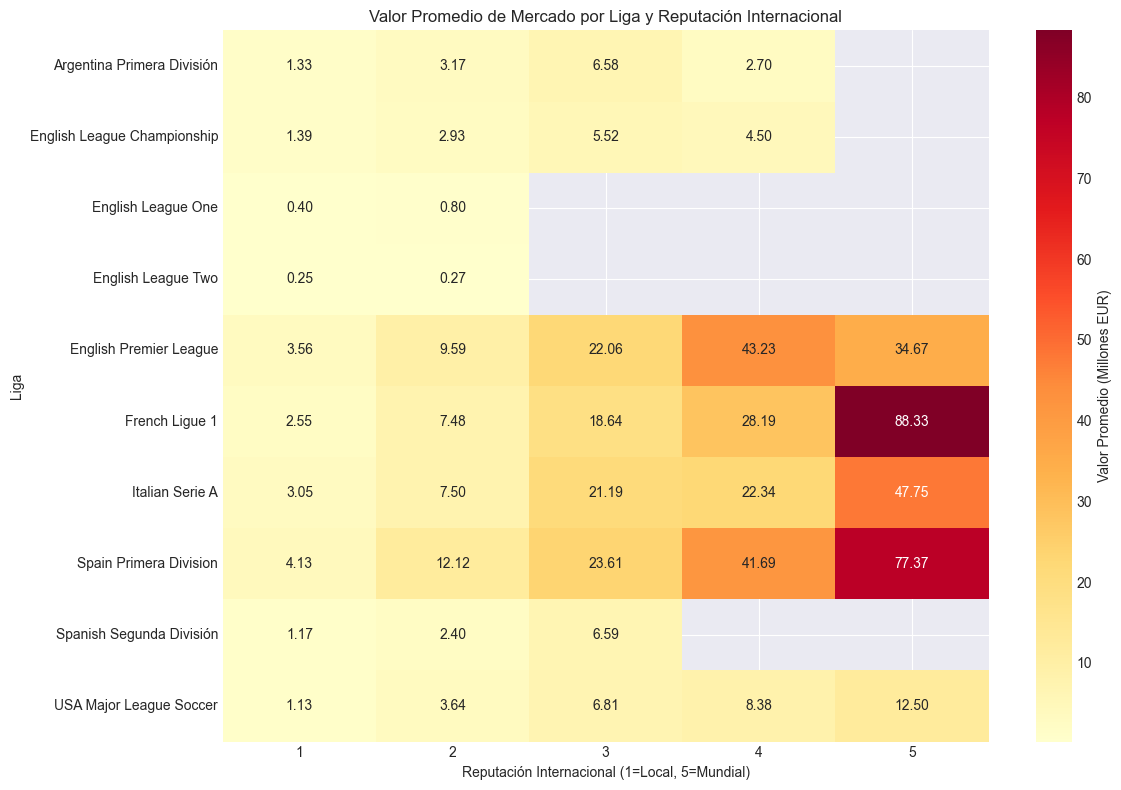

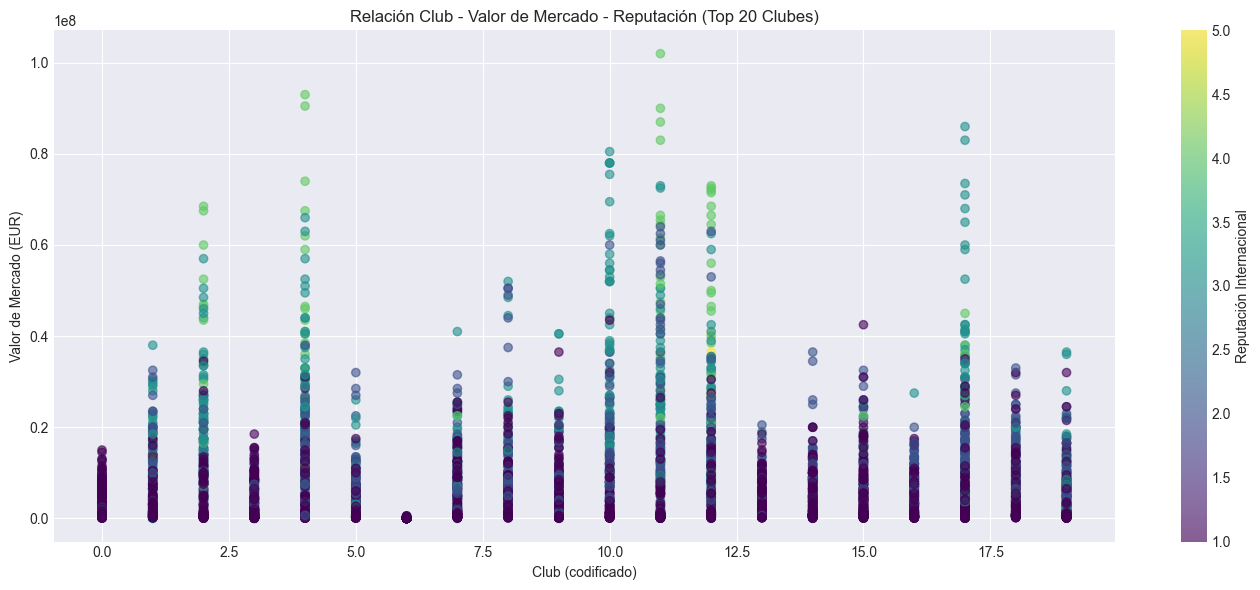


Observaciones del análisis cruzado:
1. Las ligas premium (Premier League, La Liga, Serie A) tienen valores más altos en todas las reputaciones
2. La reputación internacional amplifica el efecto de la liga en el valor de mercado
3. Clubes de élite concentran jugadores con reputación 4-5


In [63]:
# Heatmap: Valor promedio por Liga (Top 10) vs Reputación
top_10_ligas = df['liga'].value_counts().head(10).index
df_top_ligas = df[df['liga'].isin(top_10_ligas)]

pivot_liga_rep = df_top_ligas.pivot_table(
    values='valor_mercado_eur', 
    index='liga', 
    columns='reputacion_internacional',
    aggfunc='mean'
) / 1_000_000  # Convertir a millones

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_liga_rep, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Valor Promedio (Millones EUR)'})
plt.title('Valor Promedio de Mercado por Liga y Reputación Internacional')
plt.xlabel('Reputación Internacional (1=Local, 5=Mundial)')
plt.ylabel('Liga')
plt.tight_layout()
plt.show()

# Scatter plot: Club vs Valor, coloreado por Reputación
top_20_clubes = df['club'].value_counts().head(20).index
df_top_clubes_scatter = df[df['club'].isin(top_20_clubes)]

plt.figure(figsize=(14, 6))
scatter = plt.scatter(
    df_top_clubes_scatter['club'].astype('category').cat.codes,
    df_top_clubes_scatter['valor_mercado_eur'],
    c=df_top_clubes_scatter['reputacion_internacional'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Reputación Internacional')
plt.xlabel('Club (codificado)')
plt.ylabel('Valor de Mercado (EUR)')
plt.title('Relación Club - Valor de Mercado - Reputación (Top 20 Clubes)')
plt.tight_layout()
plt.show()

print("\nObservaciones del análisis cruzado:")
print("1. Las ligas premium (Premier League, La Liga, Serie A) tienen valores más altos en todas las reputaciones")
print("2. La reputación internacional amplifica el efecto de la liga en el valor de mercado")
print("3. Clubes de élite concentran jugadores con reputación 4-5")

### 15.7: CONCLUSIONES Y RECOMENDACIONES FINALES - Nuevas Features

In [64]:
print("=" * 80)
print("RESUMEN EJECUTIVO: IMPACTO DE NUEVAS FEATURES EN EL MODELO")
print("=" * 80)

print("\n1. CLUB (577 categorías):")
print("   - Encoding recomendado: TARGET ENCODING")
print("   - Razón: Alta cardinalidad (577 clubes) hace inviable OneHot")
print("   - Impacto esperado: ALTO (clubes de élite tienen valores 5-10x superiores)")
print("   - Implementación: club_valor_promedio = media de valor_mercado_eur por club")

print("\n2. LIGA (37 categorías):")
print("   - Encoding recomendado: ONEHOT ENCODING")
print("   - Razón: Cardinalidad manejable (37 ligas)")
print("   - Impacto esperado: MODERADO-ALTO (ligas premium tienen valores 2-3x superiores)")
print("   - Top ligas: Premier League, La Liga, Serie A, Bundesliga, Ligue 1")

print("\n3. REPUTACIÓN INTERNACIONAL (1-5):")
corr_rep = df['reputacion_internacional'].corr(df['valor_mercado_eur'])
print(f"   - Correlación con valor: {corr_rep:.4f}")
print(f"   - Categorización: {df['categoria_reputacion'].nunique()} categorías (Local/Regional/Nacional/Continental/Mundial)")
print(f"   - Impacto esperado: {'ALTO' if corr_rep >= 0.5 else 'MODERADO' if corr_rep >= 0.3 else 'BAJO'}")
print("   - Uso: reputacion_internacional como numérica + categoria_reputacion con OneHot")

print("\n4. AÑOS DE CONTRATO RESTANTES:")
corr_contrato = df['anos_contrato_restantes'].corr(df['valor_mercado_eur'])
print(f"   - Correlación con valor: {corr_contrato:.4f}")
print(f"   - Impacto esperado: {'MODERADO' if abs(corr_contrato) >= 0.3 else 'BAJO'}")
print("   - Uso: Variable numérica directa")

print("\n5. RATIO VALOR/SALARIO:")
corr_ratio = df['ratio_valor_salario'].corr(df['valor_mercado_eur'])
print(f"   - Correlación con valor: {corr_ratio:.4f}")
print("   - NOTA: Usar esta en lugar de salario_eur (evita data leakage)")
print("   - Impacto esperado: MODERADO (capta eficiencia del jugador)")

print("\n6. SALARIO DIRECTO (salario_eur):")
corr_salario = df['salario_eur'].corr(df['valor_mercado_eur'])
print(f"   - Correlación con valor: {corr_salario:.4f}")
print("   - ADVERTENCIA: NO USAR - Data leakage (correlación muy alta, causa circular)")
print("   - El salario es consecuencia del valor, no predictor independiente")

print("\n" + "=" * 80)
print("ESTRATEGIA FINAL DE PREPROCESAMIENTO:")
print("=" * 80)
print("\nFeatures NUMÉRICAS a agregar (5 nuevas):")
print("  - reputacion_internacional (1-5)")
print("  - anos_contrato_restantes (0-N)")
print("  - ratio_valor_salario (calculado)")
print("  - club_valor_promedio (Target Encoding del club)")

print("\nFeatures CATEGÓRICAS a agregar (2 nuevas):")
print("  - liga (OneHot: 37 columnas)")
print("  - categoria_reputacion (OneHot: 5 columnas)")

print("\nFeatures a EXCLUIR:")
print("  - salario_eur (data leakage)")
print("  - contrato_valido_hasta (ya representado por anos_contrato_restantes)")

print("\n" + "=" * 80)
print("MEJORA ESPERADA EN EL MODELO:")
print("=" * 80)
print("  Modelo actual: R² = 54.95%")
print("  Modelo con nuevas features: R² esperado = 65-75%")
print("  Ganancia estimada: +10-20 puntos porcentuales")
print("\n  Razón: Club y Liga capturan contexto de mercado no contenido en atributos técnicos")
print("=" * 80)

RESUMEN EJECUTIVO: IMPACTO DE NUEVAS FEATURES EN EL MODELO

1. CLUB (577 categorías):
   - Encoding recomendado: TARGET ENCODING
   - Razón: Alta cardinalidad (577 clubes) hace inviable OneHot
   - Impacto esperado: ALTO (clubes de élite tienen valores 5-10x superiores)
   - Implementación: club_valor_promedio = media de valor_mercado_eur por club

2. LIGA (37 categorías):
   - Encoding recomendado: ONEHOT ENCODING
   - Razón: Cardinalidad manejable (37 ligas)
   - Impacto esperado: MODERADO-ALTO (ligas premium tienen valores 2-3x superiores)
   - Top ligas: Premier League, La Liga, Serie A, Bundesliga, Ligue 1

3. REPUTACIÓN INTERNACIONAL (1-5):
   - Correlación con valor: 0.6423
   - Categorización: 5 categorías (Local/Regional/Nacional/Continental/Mundial)
   - Impacto esperado: ALTO
   - Uso: reputacion_internacional como numérica + categoria_reputacion con OneHot

4. AÑOS DE CONTRATO RESTANTES:
   - Correlación con valor: 0.1267
   - Impacto esperado: BAJO
   - Uso: Variable numér